In [1]:
import pandas as pd
import pandas as pd
import plotly.express as px
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import hvplot.pandas
import plotly.figure_factory as ff
import math

In [2]:
total_df = pd.read_csv('Play_by_play_batters.csv')

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_21648/3955586084.py:1: DtypeWarning: Columns (51,57) have mixed types. Specify dtype option on import or set low_memory=False.
  total_df = pd.read_csv('Play_by_play_batters.csv')


In [3]:
total_df.drop(columns=['rolling_spinRate_Fastball', 'rolling_spinRate_Movement Fastball',
       'rolling_spinRate_Breaking', 'rolling_spinRate_Offspeed',
       'rolling_spinRate_Non-Competitive', 'rolling_breakLength_Fastball',
       'rolling_breakLength_Movement Fastball', 'rolling_breakLength_Breaking',
       'rolling_breakLength_Offspeed', 'rolling_breakLength_Non-Competitive',
       'rolling_Start_speed_Fastball', 'rolling_Start_speed_Movement Fastball',
       'rolling_Start_speed_Breaking', 'rolling_Start_speed_Offspeed',
       'rolling_Start_speed_Non-Competitive',
       'rolling_breakVerticalInduced_Fastball',
       'rolling_breakVerticalInduced_Movement Fastball',
       'rolling_breakVerticalInduced_Breaking',
       'rolling_breakVerticalInduced_Offspeed',
       'rolling_breakVerticalInduced_Non-Competitive',
       'rolling_breakHorizontal_Fastball',
       'rolling_breakHorizontal_Movement Fastball',
       'rolling_breakHorizontal_Breaking', 'rolling_breakHorizontal_Offspeed',
       'rolling_breakHorizontal_Non-Competitive',
       'rolling_breakVertical_Fastball',
       'rolling_breakVertical_Movement Fastball',
       'rolling_breakVertical_Breaking', 'rolling_breakVertical_Offspeed',
       'rolling_breakVertical_Non-Competitive'], inplace=True)

In [4]:
total_df.columns

Index(['Unnamed: 0', 'roll_Start_speed_std', 'roll_End_speed_std',
       'Rolling_start_speed', 'Rolling_end_speed', 'End_Speed', 'Speed',
       'Prev_speed', 'Strike_pitch', 'Swinging', 'Pitches_faced',
       'Atbats_faced', 'Pitch_count', 'Other', 'Fastball', 'Movement Fastball',
       'Breaking', 'Offspeed', 'Non-Competitive', 'Actual_pitch', 'Outs',
       'location', 'spinRate_rolling', 'breakLength_rolling',
       'Start_speed_rolling', 'breakVerticalInduced_rolling',
       'breakHorizontal_rolling', 'breakVertical_rolling', 'Outcome', 'Balls',
       'Strikes', 'Event', 'Pitch', 'Previous_Pitches', 'Start_speed',
       'breakAngle', 'breakLength', 'breakVertical', 'breakHorizontal',
       'breakVerticalInduced', 'spinRate', 'batter_name', 'batter_side',
       'batter_split', 'pitcher_id', 'pitcher_name', 'pitcher_hand',
       'pitcher_split', 'Date', 'X', 'Y', 'isTopInning', 'Inning', 'awayScore',
       'homeScore', 'strikeZoneTop', 'strikeZoneBottom', 'IsOut', 'AVG',

In [5]:
len(total_df)

10404427

In [6]:
total_df['Balls'].unique()

array([0, 1, 2, 3])

In [7]:
total_df = total_df.loc[(total_df['Strikes'] == 2) & (total_df['Balls'] == 3)]

len(total_df)

516841

In [8]:

total_df['Event'] = total_df['Event'].fillna('Nothing')

In [9]:
total_df['Y_mid'] = total_df['strikeZoneTop'] - total_df['strikeZoneBottom']

total_df['Distance_From_Center'] = total_df.apply(lambda x: math.sqrt((x['X']) ** 2 + (x['Y'] - x['Y_mid']) ** 2), axis=1)


In [10]:
total_df.isna().sum()

Unnamed: 0                   0
roll_Start_speed_std      3871
roll_End_speed_std        3871
Rolling_start_speed       3871
Rolling_end_speed         3871
                         ...  
Offspeed_Out_pitch           0
Offspeed_strike_ratio    96346
Offspeed_out_ratio       96346
Y_mid                      154
Distance_From_Center       324
Length: 78, dtype: int64

In [11]:
total_df.drop(columns=['breakVerticalInduced_rolling', 'breakHorizontal_rolling', 'breakVertical_rolling', 'breakVertical', 'breakHorizontal', 'breakVerticalInduced'], inplace=True)



In [12]:
total_df.dropna(inplace=True)

len(total_df)

324614

In [13]:
len(total_df['Previous_Pitches'].unique())

34066

In [14]:
total_df['Event'].unique()

array(['Nothing', 'Strikeout', 'Groundout', 'Lineout', 'Walk', 'Double',
       'Field Error', 'Pop Out', 'Single', 'Home Run', 'Flyout',
       'Forceout', 'Grounded Into DP', 'Strikeout Double Play',
       'Double Play', 'Fielders Choice', 'Sac Fly', 'Fielders Choice Out',
       'Triple', 'Hit By Pitch', 'Sac Bunt', 'Intent Walk',
       'Bunt Pop Out', 'Bunt Groundout', 'Catcher Interference',
       'Caught Stealing 2B', 'Sac Fly Double Play', 'Triple Play',
       'Runner Out', 'Pickoff Caught Stealing 2B', 'Pickoff 1B',
       'Bunt Lineout'], dtype=object)

In [15]:
irrelevant = ['Pickoff Caught Stealing 2B', 'Pickoff 1B', 'Pickoff 3B' ,'Caught Stealing 2B', 'Intent Walk']

total_df = total_df[~total_df['Event'].isin(irrelevant)]

In [16]:
len(total_df)

324527

In [17]:
total_df['Event'].unique()

array(['Nothing', 'Strikeout', 'Groundout', 'Lineout', 'Walk', 'Double',
       'Field Error', 'Pop Out', 'Single', 'Home Run', 'Flyout',
       'Forceout', 'Grounded Into DP', 'Strikeout Double Play',
       'Double Play', 'Fielders Choice', 'Sac Fly', 'Fielders Choice Out',
       'Triple', 'Hit By Pitch', 'Sac Bunt', 'Bunt Pop Out',
       'Bunt Groundout', 'Catcher Interference', 'Sac Fly Double Play',
       'Triple Play', 'Runner Out', 'Bunt Lineout'], dtype=object)

In [18]:
total_df['Out'] = total_df['Event'].apply(lambda x: 1 if x not in ['Nothing', 'Single',
       'Walk', 'Double', 'Home Run','Hit By Pitch', 'Triple'] else 0)

In [19]:
total_df.columns

Index(['Unnamed: 0', 'roll_Start_speed_std', 'roll_End_speed_std',
       'Rolling_start_speed', 'Rolling_end_speed', 'End_Speed', 'Speed',
       'Prev_speed', 'Strike_pitch', 'Swinging', 'Pitches_faced',
       'Atbats_faced', 'Pitch_count', 'Other', 'Fastball', 'Movement Fastball',
       'Breaking', 'Offspeed', 'Non-Competitive', 'Actual_pitch', 'Outs',
       'location', 'spinRate_rolling', 'breakLength_rolling',
       'Start_speed_rolling', 'Outcome', 'Balls', 'Strikes', 'Event', 'Pitch',
       'Previous_Pitches', 'Start_speed', 'breakAngle', 'breakLength',
       'spinRate', 'batter_name', 'batter_side', 'batter_split', 'pitcher_id',
       'pitcher_name', 'pitcher_hand', 'pitcher_split', 'Date', 'X', 'Y',
       'isTopInning', 'Inning', 'awayScore', 'homeScore', 'strikeZoneTop',
       'strikeZoneBottom', 'IsOut', 'AVG', 'OBP', 'SLG',
       'Percentage_Fastballs', 'Percentage_Breaking', 'Percentage_Offspeed',
       'Percentage_Movement Fastball', 'Fastball_strike_ratio',
  

In [20]:
total_df.drop(columns=['Out'], inplace=True)

In [21]:
total_df['IsOut'] = total_df['IsOut'].apply(lambda x: 1 if x==True else 0)

In [22]:
total_df.drop(columns=['batter_name', 'pitcher_name', 'Unnamed: 0','Outcome'], inplace=True)

In [23]:
total_df.columns

Index(['roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed', 'End_Speed', 'Speed', 'Prev_speed', 'Strike_pitch',
       'Swinging', 'Pitches_faced', 'Atbats_faced', 'Pitch_count', 'Other',
       'Fastball', 'Movement Fastball', 'Breaking', 'Offspeed',
       'Non-Competitive', 'Actual_pitch', 'Outs', 'location',
       'spinRate_rolling', 'breakLength_rolling', 'Start_speed_rolling',
       'Balls', 'Strikes', 'Event', 'Pitch', 'Previous_Pitches', 'Start_speed',
       'breakAngle', 'breakLength', 'spinRate', 'batter_side', 'batter_split',
       'pitcher_id', 'pitcher_hand', 'pitcher_split', 'Date', 'X', 'Y',
       'isTopInning', 'Inning', 'awayScore', 'homeScore', 'strikeZoneTop',
       'strikeZoneBottom', 'IsOut', 'AVG', 'OBP', 'SLG',
       'Percentage_Fastballs', 'Percentage_Breaking', 'Percentage_Offspeed',
       'Percentage_Movement Fastball', 'Fastball_strike_ratio',
       'Fastball_out_ratio', 'Breaking_Out_pitch', 'Breaking_stri

In [24]:
total_df['Matchup'] = total_df.apply(lambda x: x['batter_split'].split('_')[-1] + '_' + x['pitcher_split'], axis=1)

In [25]:
total_df.drop(columns=['batter_split', 'pitcher_split', 'Actual_pitch'], inplace=True)

In [26]:
total_df.columns

Index(['roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed', 'End_Speed', 'Speed', 'Prev_speed', 'Strike_pitch',
       'Swinging', 'Pitches_faced', 'Atbats_faced', 'Pitch_count', 'Other',
       'Fastball', 'Movement Fastball', 'Breaking', 'Offspeed',
       'Non-Competitive', 'Outs', 'location', 'spinRate_rolling',
       'breakLength_rolling', 'Start_speed_rolling', 'Balls', 'Strikes',
       'Event', 'Pitch', 'Previous_Pitches', 'Start_speed', 'breakAngle',
       'breakLength', 'spinRate', 'batter_side', 'pitcher_id', 'pitcher_hand',
       'Date', 'X', 'Y', 'isTopInning', 'Inning', 'awayScore', 'homeScore',
       'strikeZoneTop', 'strikeZoneBottom', 'IsOut', 'AVG', 'OBP', 'SLG',
       'Percentage_Fastballs', 'Percentage_Breaking', 'Percentage_Offspeed',
       'Percentage_Movement Fastball', 'Fastball_strike_ratio',
       'Fastball_out_ratio', 'Breaking_Out_pitch', 'Breaking_strike_ratio',
       'Breaking_out_ratio', 'Movement Fastba

In [27]:
total_df[['Matchup']].head(5)

,Matchup
2012,RHP_vs_LHB
2199,RHP_vs_RHB
2200,RHP_vs_RHB
2436,RHP_vs_RHB
2437,RHP_vs_RHB


In [28]:
total_df['Matchup'].unique()

array(['RHP_vs_LHB', 'RHP_vs_RHB', 'LHP_vs_RHB', 'LHP_vs_LHB'],
      dtype=object)

In [29]:
# Generate dummy variables only for 'Matchup' column
total_df = pd.get_dummies(total_df, columns=['Matchup'])

# Convert only the new dummy columns to int
dummy_cols = [col for col in total_df.columns if col.startswith('Matchup_')]
total_df[dummy_cols] = total_df[dummy_cols].astype(int)


In [30]:
total_df.head()

,roll_Start_speed_std,roll_End_speed_std,Rolling_start_speed,Rolling_end_speed,End_Speed,Speed,Prev_speed,Strike_pitch,Swinging,Pitches_faced,...,Movement Fastball_out_ratio,Offspeed_Out_pitch,Offspeed_strike_ratio,Offspeed_out_ratio,Y_mid,Distance_From_Center,Matchup_LHP_vs_LHB,Matchup_LHP_vs_RHB,Matchup_RHP_vs_LHB,Matchup_RHP_vs_RHB
2012,3.102393,2.613618,89.880667,82.514333,86.4,93.0,93.1,0,0,28,...,0.166667,0,0.441860,0.116279,2.06,0.623849,0,0,1,0
2199,2.712457,2.321990,89.691667,82.799333,87.1,95.1,90.3,0,0,14,...,0.100000,0,0.418182,0.145455,1.94,0.812670,0,0,0,1
2200,2.728357,2.332313,89.715667,82.820333,86.8,94.0,95.1,0,0,15,...,0.100000,0,0.418182,0.145455,1.94,0.650278,0,0,0,1
2436,2.870930,2.350715,89.918333,82.879333,80.9,86.8,86.3,0,0,25,...,0.133333,0,0.416667,0.222222,1.67,0.789227,0,0,0,1
2437,2.876480,2.353331,89.906667,82.874333,84.1,91.4,86.8,0,0,26,...,0.142857,0,0.416667,0.222222,1.67,2.350881,0,0,0,1


In [31]:
total_df.columns

Index(['roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed', 'End_Speed', 'Speed', 'Prev_speed', 'Strike_pitch',
       'Swinging', 'Pitches_faced', 'Atbats_faced', 'Pitch_count', 'Other',
       'Fastball', 'Movement Fastball', 'Breaking', 'Offspeed',
       'Non-Competitive', 'Outs', 'location', 'spinRate_rolling',
       'breakLength_rolling', 'Start_speed_rolling', 'Balls', 'Strikes',
       'Event', 'Pitch', 'Previous_Pitches', 'Start_speed', 'breakAngle',
       'breakLength', 'spinRate', 'batter_side', 'pitcher_id', 'pitcher_hand',
       'Date', 'X', 'Y', 'isTopInning', 'Inning', 'awayScore', 'homeScore',
       'strikeZoneTop', 'strikeZoneBottom', 'IsOut', 'AVG', 'OBP', 'SLG',
       'Percentage_Fastballs', 'Percentage_Breaking', 'Percentage_Offspeed',
       'Percentage_Movement Fastball', 'Fastball_strike_ratio',
       'Fastball_out_ratio', 'Breaking_Out_pitch', 'Breaking_strike_ratio',
       'Breaking_out_ratio', 'Movement Fastba

In [32]:
total_df['Score_differential'] = total_df.apply(lambda x: x['awayScore'] - x['homeScore'] if x['isTopInning'] == True else x['homeScore'] - x['awayScore'], axis=1)




In [33]:
total_df.drop(columns=['awayScore', 'homeScore', 'isTopInning'], inplace=True)

In [34]:
total_df.columns

Index(['roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed', 'End_Speed', 'Speed', 'Prev_speed', 'Strike_pitch',
       'Swinging', 'Pitches_faced', 'Atbats_faced', 'Pitch_count', 'Other',
       'Fastball', 'Movement Fastball', 'Breaking', 'Offspeed',
       'Non-Competitive', 'Outs', 'location', 'spinRate_rolling',
       'breakLength_rolling', 'Start_speed_rolling', 'Balls', 'Strikes',
       'Event', 'Pitch', 'Previous_Pitches', 'Start_speed', 'breakAngle',
       'breakLength', 'spinRate', 'batter_side', 'pitcher_id', 'pitcher_hand',
       'Date', 'X', 'Y', 'Inning', 'strikeZoneTop', 'strikeZoneBottom',
       'IsOut', 'AVG', 'OBP', 'SLG', 'Percentage_Fastballs',
       'Percentage_Breaking', 'Percentage_Offspeed',
       'Percentage_Movement Fastball', 'Fastball_strike_ratio',
       'Fastball_out_ratio', 'Breaking_Out_pitch', 'Breaking_strike_ratio',
       'Breaking_out_ratio', 'Movement Fastball_Out_pitch',
       'Movement Fastball_

In [35]:
total_df.drop(columns=['X', 'Y', 'Y_mid', 'location'], inplace=True)

In [36]:
total_df.columns

Index(['roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed', 'End_Speed', 'Speed', 'Prev_speed', 'Strike_pitch',
       'Swinging', 'Pitches_faced', 'Atbats_faced', 'Pitch_count', 'Other',
       'Fastball', 'Movement Fastball', 'Breaking', 'Offspeed',
       'Non-Competitive', 'Outs', 'spinRate_rolling', 'breakLength_rolling',
       'Start_speed_rolling', 'Balls', 'Strikes', 'Event', 'Pitch',
       'Previous_Pitches', 'Start_speed', 'breakAngle', 'breakLength',
       'spinRate', 'batter_side', 'pitcher_id', 'pitcher_hand', 'Date',
       'Inning', 'strikeZoneTop', 'strikeZoneBottom', 'IsOut', 'AVG', 'OBP',
       'SLG', 'Percentage_Fastballs', 'Percentage_Breaking',
       'Percentage_Offspeed', 'Percentage_Movement Fastball',
       'Fastball_strike_ratio', 'Fastball_out_ratio', 'Breaking_Out_pitch',
       'Breaking_strike_ratio', 'Breaking_out_ratio',
       'Movement Fastball_Out_pitch', 'Movement Fastball_strike_ratio',
       'Moveme

In [37]:
from category_encoders import TargetEncoder

encoder = TargetEncoder(cols=['Previous_Pitches'])
total_df['sequence_encoded'] = encoder.fit_transform(total_df['Previous_Pitches'], total_df['IsOut'])


In [38]:
total_df.drop(columns=['Previous_Pitches'], inplace=True)

In [39]:
total_df.columns

Index(['roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed', 'End_Speed', 'Speed', 'Prev_speed', 'Strike_pitch',
       'Swinging', 'Pitches_faced', 'Atbats_faced', 'Pitch_count', 'Other',
       'Fastball', 'Movement Fastball', 'Breaking', 'Offspeed',
       'Non-Competitive', 'Outs', 'spinRate_rolling', 'breakLength_rolling',
       'Start_speed_rolling', 'Balls', 'Strikes', 'Event', 'Pitch',
       'Start_speed', 'breakAngle', 'breakLength', 'spinRate', 'batter_side',
       'pitcher_id', 'pitcher_hand', 'Date', 'Inning', 'strikeZoneTop',
       'strikeZoneBottom', 'IsOut', 'AVG', 'OBP', 'SLG',
       'Percentage_Fastballs', 'Percentage_Breaking', 'Percentage_Offspeed',
       'Percentage_Movement Fastball', 'Fastball_strike_ratio',
       'Fastball_out_ratio', 'Breaking_Out_pitch', 'Breaking_strike_ratio',
       'Breaking_out_ratio', 'Movement Fastball_Out_pitch',
       'Movement Fastball_strike_ratio', 'Movement Fastball_out_ratio',
   

In [40]:
total_df.drop(columns=['Event', 'Date'], inplace=True)

In [41]:
total_df.drop(columns=['Matchup_RHP_vs_RHB'], inplace=True)

In [42]:
total_df

,roll_Start_speed_std,roll_End_speed_std,Rolling_start_speed,Rolling_end_speed,End_Speed,Speed,Prev_speed,Strike_pitch,Swinging,Pitches_faced,...,Movement Fastball_out_ratio,Offspeed_Out_pitch,Offspeed_strike_ratio,Offspeed_out_ratio,Distance_From_Center,Matchup_LHP_vs_LHB,Matchup_LHP_vs_RHB,Matchup_RHP_vs_LHB,Score_differential,sequence_encoded
2012,3.102393,2.613618,89.880667,82.514333,86.4,93.0,93.1,0,0,28,...,0.166667,0,0.441860,0.116279,0.623849,0,0,1,6.0,0.507526
2199,2.712457,2.321990,89.691667,82.799333,87.1,95.1,90.3,0,0,14,...,0.100000,0,0.418182,0.145455,0.812670,0,0,0,-4.0,0.525933
2200,2.728357,2.332313,89.715667,82.820333,86.8,94.0,95.1,0,0,15,...,0.100000,0,0.418182,0.145455,0.650278,0,0,0,-4.0,0.624031
2436,2.870930,2.350715,89.918333,82.879333,80.9,86.8,86.3,0,0,25,...,0.133333,0,0.416667,0.222222,0.789227,0,0,0,-1.0,0.552192
2437,2.876480,2.353331,89.906667,82.874333,84.1,91.4,86.8,0,0,26,...,0.142857,0,0.416667,0.222222,2.350881,0,0,0,-1.0,0.536741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10404351,4.835916,4.192942,91.532667,84.402333,80.7,87.2,78.7,0,0,19,...,0.173913,0,0.166667,0.000000,0.617881,0,0,1,-3.0,0.561993
10404352,4.841359,4.196641,91.524000,84.397000,87.0,95.2,87.2,0,0,20,...,0.173913,0,0.166667,0.000000,2.253752,0,0,1,-3.0,0.545455
10404398,4.882303,4.231790,91.101667,83.979667,81.6,88.3,95.9,0,0,34,...,0.190476,0,0.000000,0.000000,1.130972,0,0,1,-5.0,0.558003
10404399,4.884855,4.233515,91.090333,83.968000,74.3,80.6,88.3,0,0,35,...,0.190476,0,0.000000,0.000000,1.626860,0,0,1,-5.0,0.513514


In [43]:
total_df.columns

Index(['roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed', 'End_Speed', 'Speed', 'Prev_speed', 'Strike_pitch',
       'Swinging', 'Pitches_faced', 'Atbats_faced', 'Pitch_count', 'Other',
       'Fastball', 'Movement Fastball', 'Breaking', 'Offspeed',
       'Non-Competitive', 'Outs', 'spinRate_rolling', 'breakLength_rolling',
       'Start_speed_rolling', 'Balls', 'Strikes', 'Pitch', 'Start_speed',
       'breakAngle', 'breakLength', 'spinRate', 'batter_side', 'pitcher_id',
       'pitcher_hand', 'Inning', 'strikeZoneTop', 'strikeZoneBottom', 'IsOut',
       'AVG', 'OBP', 'SLG', 'Percentage_Fastballs', 'Percentage_Breaking',
       'Percentage_Offspeed', 'Percentage_Movement Fastball',
       'Fastball_strike_ratio', 'Fastball_out_ratio', 'Breaking_Out_pitch',
       'Breaking_strike_ratio', 'Breaking_out_ratio',
       'Movement Fastball_Out_pitch', 'Movement Fastball_strike_ratio',
       'Movement Fastball_out_ratio', 'Offspeed_Out_pitch'

In [44]:
total_df['Count'] = total_df.apply(lambda x: f'{x["Balls"]}-{x["Strikes"]}', axis=1)

In [45]:
# Generate dummy variables only for 'Matchup' column
total_df = pd.get_dummies(total_df, columns=['Count'])

# Convert only the new dummy columns to int
dummy_cols = [col for col in total_df.columns if col.startswith('Count_')]
total_df[dummy_cols] = total_df[dummy_cols].astype(int)


In [46]:
from category_encoders import TargetEncoder

encoder = TargetEncoder(cols=['pitcher_id'])
total_df['pitcher_encoded'] = encoder.fit_transform(total_df['pitcher_id'], total_df['IsOut'])


In [47]:
total_df.drop(columns=['batter_side', 'pitcher_hand','strikeZoneTop', 'strikeZoneBottom','Balls', 'Strikes'], inplace=True)

In [48]:
total_df.columns

Index(['roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed', 'End_Speed', 'Speed', 'Prev_speed', 'Strike_pitch',
       'Swinging', 'Pitches_faced', 'Atbats_faced', 'Pitch_count', 'Other',
       'Fastball', 'Movement Fastball', 'Breaking', 'Offspeed',
       'Non-Competitive', 'Outs', 'spinRate_rolling', 'breakLength_rolling',
       'Start_speed_rolling', 'Pitch', 'Start_speed', 'breakAngle',
       'breakLength', 'spinRate', 'pitcher_id', 'Inning', 'IsOut', 'AVG',
       'OBP', 'SLG', 'Percentage_Fastballs', 'Percentage_Breaking',
       'Percentage_Offspeed', 'Percentage_Movement Fastball',
       'Fastball_strike_ratio', 'Fastball_out_ratio', 'Breaking_Out_pitch',
       'Breaking_strike_ratio', 'Breaking_out_ratio',
       'Movement Fastball_Out_pitch', 'Movement Fastball_strike_ratio',
       'Movement Fastball_out_ratio', 'Offspeed_Out_pitch',
       'Offspeed_strike_ratio', 'Offspeed_out_ratio', 'Distance_From_Center',
       'Matchup

In [49]:
counts = total_df['pitcher_id'].value_counts()
total_df['pitcher_id_freq'] = total_df['pitcher_id'].map(counts)


In [50]:
total_df

,roll_Start_speed_std,roll_End_speed_std,Rolling_start_speed,Rolling_end_speed,End_Speed,Speed,Prev_speed,Strike_pitch,Swinging,Pitches_faced,...,Offspeed_out_ratio,Distance_From_Center,Matchup_LHP_vs_LHB,Matchup_LHP_vs_RHB,Matchup_RHP_vs_LHB,Score_differential,sequence_encoded,Count_3-2,pitcher_encoded,pitcher_id_freq
2012,3.102393,2.613618,89.880667,82.514333,86.4,93.0,93.1,0,0,28,...,0.116279,0.623849,0,0,1,6.0,0.507526,1,0.641332,15
2199,2.712457,2.321990,89.691667,82.799333,87.1,95.1,90.3,0,0,14,...,0.145455,0.812670,0,0,0,-4.0,0.525933,1,0.641332,15
2200,2.728357,2.332313,89.715667,82.820333,86.8,94.0,95.1,0,0,15,...,0.145455,0.650278,0,0,0,-4.0,0.624031,1,0.641332,15
2436,2.870930,2.350715,89.918333,82.879333,80.9,86.8,86.3,0,0,25,...,0.222222,0.789227,0,0,0,-1.0,0.552192,1,0.641332,15
2437,2.876480,2.353331,89.906667,82.874333,84.1,91.4,86.8,0,0,26,...,0.222222,2.350881,0,0,0,-1.0,0.536741,1,0.641332,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10404351,4.835916,4.192942,91.532667,84.402333,80.7,87.2,78.7,0,0,19,...,0.000000,0.617881,0,0,1,-3.0,0.561993,1,0.505263,285
10404352,4.841359,4.196641,91.524000,84.397000,87.0,95.2,87.2,0,0,20,...,0.000000,2.253752,0,0,1,-3.0,0.545455,1,0.505263,285
10404398,4.882303,4.231790,91.101667,83.979667,81.6,88.3,95.9,0,0,34,...,0.000000,1.130972,0,0,1,-5.0,0.558003,1,0.505263,285
10404399,4.884855,4.233515,91.090333,83.968000,74.3,80.6,88.3,0,0,35,...,0.000000,1.626860,0,0,1,-5.0,0.513514,1,0.505263,285


In [51]:
from sklearn.preprocessing import LabelEncoder

# 1. Encode the Pitch Type column
label_encoder = LabelEncoder()
total_df['Pitch_Type_encoded'] = label_encoder.fit_transform(total_df['Pitch'])

In [52]:
total_df

,roll_Start_speed_std,roll_End_speed_std,Rolling_start_speed,Rolling_end_speed,End_Speed,Speed,Prev_speed,Strike_pitch,Swinging,Pitches_faced,...,Distance_From_Center,Matchup_LHP_vs_LHB,Matchup_LHP_vs_RHB,Matchup_RHP_vs_LHB,Score_differential,sequence_encoded,Count_3-2,pitcher_encoded,pitcher_id_freq,Pitch_Type_encoded
2012,3.102393,2.613618,89.880667,82.514333,86.4,93.0,93.1,0,0,28,...,0.623849,0,0,1,6.0,0.507526,1,0.641332,15,1
2199,2.712457,2.321990,89.691667,82.799333,87.1,95.1,90.3,0,0,14,...,0.812670,0,0,0,-4.0,0.525933,1,0.641332,15,1
2200,2.728357,2.332313,89.715667,82.820333,86.8,94.0,95.1,0,0,15,...,0.650278,0,0,0,-4.0,0.624031,1,0.641332,15,1
2436,2.870930,2.350715,89.918333,82.879333,80.9,86.8,86.3,0,0,25,...,0.789227,0,0,0,-1.0,0.552192,1,0.641332,15,0
2437,2.876480,2.353331,89.906667,82.874333,84.1,91.4,86.8,0,0,26,...,2.350881,0,0,0,-1.0,0.536741,1,0.641332,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10404351,4.835916,4.192942,91.532667,84.402333,80.7,87.2,78.7,0,0,19,...,0.617881,0,0,1,-3.0,0.561993,1,0.505263,285,0
10404352,4.841359,4.196641,91.524000,84.397000,87.0,95.2,87.2,0,0,20,...,2.253752,0,0,1,-3.0,0.545455,1,0.505263,285,1
10404398,4.882303,4.231790,91.101667,83.979667,81.6,88.3,95.9,0,0,34,...,1.130972,0,0,1,-5.0,0.558003,1,0.505263,285,0
10404399,4.884855,4.233515,91.090333,83.968000,74.3,80.6,88.3,0,0,35,...,1.626860,0,0,1,-5.0,0.513514,1,0.505263,285,0


In [53]:
total_df.drop(columns=['pitcher_encoded', 'pitcher_id_freq', 'pitcher_id'], inplace=True)

In [54]:
# Generate dummy variables only for 'Matchup' column
total_df = pd.get_dummies(total_df, columns=['Pitch'])

# Convert only the new dummy columns to int
dummy_cols = [col for col in total_df.columns if col.startswith('Pitch')]
total_df[dummy_cols] = total_df[dummy_cols].astype(int)


In [55]:
total_df.columns

Index(['roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed', 'End_Speed', 'Speed', 'Prev_speed', 'Strike_pitch',
       'Swinging', 'Pitches_faced', 'Atbats_faced', 'Pitch_count', 'Other',
       'Fastball', 'Movement Fastball', 'Breaking', 'Offspeed',
       'Non-Competitive', 'Outs', 'spinRate_rolling', 'breakLength_rolling',
       'Start_speed_rolling', 'Start_speed', 'breakAngle', 'breakLength',
       'spinRate', 'Inning', 'IsOut', 'AVG', 'OBP', 'SLG',
       'Percentage_Fastballs', 'Percentage_Breaking', 'Percentage_Offspeed',
       'Percentage_Movement Fastball', 'Fastball_strike_ratio',
       'Fastball_out_ratio', 'Breaking_Out_pitch', 'Breaking_strike_ratio',
       'Breaking_out_ratio', 'Movement Fastball_Out_pitch',
       'Movement Fastball_strike_ratio', 'Movement Fastball_out_ratio',
       'Offspeed_Out_pitch', 'Offspeed_strike_ratio', 'Offspeed_out_ratio',
       'Distance_From_Center', 'Matchup_LHP_vs_LHB', 'Matchup_LHP_vs_

In [56]:
import numpy as np

In [57]:
total_df = total_df.loc[total_df['Outs'] < 3]

total_df.loc[total_df['Other'] < np.percentile(total_df['Other'], 99)]

test_df = total_df.copy()

for i in ['Other', 'Fastball', 'Movement Fastball', 'Breaking', 'Offspeed']:
    
    test_df = test_df.loc[test_df[i] < np.percentile(test_df[i], 99)]
    
    if len(test_df) == 0:
        print(i)
    
    

In [58]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Features and binary treatment (1 = fastball, 0 = not fastball)
X = test_df.drop(columns=['IsOut', 'Pitch_Breaking', 'Pitch_Fastball',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Distance_From_Center',  'End_Speed', 'Speed','Strike_pitch',
       'Swinging','Start_speed', 'breakAngle', 'breakLength',
       'spinRate','Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed',])
y = test_df["Pitch_Offspeed"]

# Fit binary logistic regression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X, y)

# Predict propensity scores (prob of being thrown a fastball)
gps_probs = model.predict_proba(X)[:, 1]  # Only prob of treatment = 1

X['Propensity_Score'] = gps_probs

# Inverse Probability Weights
ipw_weights = 1 / gps_probs
ipw_weights[y == 0] = 1 / (1 - gps_probs[y == 0])  # Fix for control group

# Optional: Stabilized Weights
treatment_probs = y.value_counts(normalize=True).sort_index().values
# treatment_probs[1] = P(T=1), treatment_probs[0] = P(T=0)

# Stabilized weights: numerator is marginal probability
stabilized_weights = np.where(
    y == 1,
    treatment_probs[1] / gps_probs,
    treatment_probs[0] / (1 - gps_probs)
)


/Users/evanbruno/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


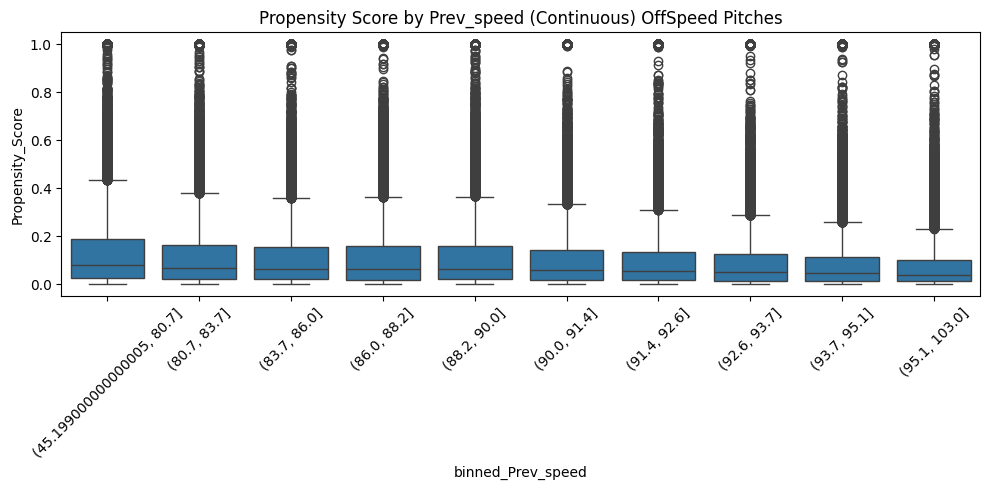

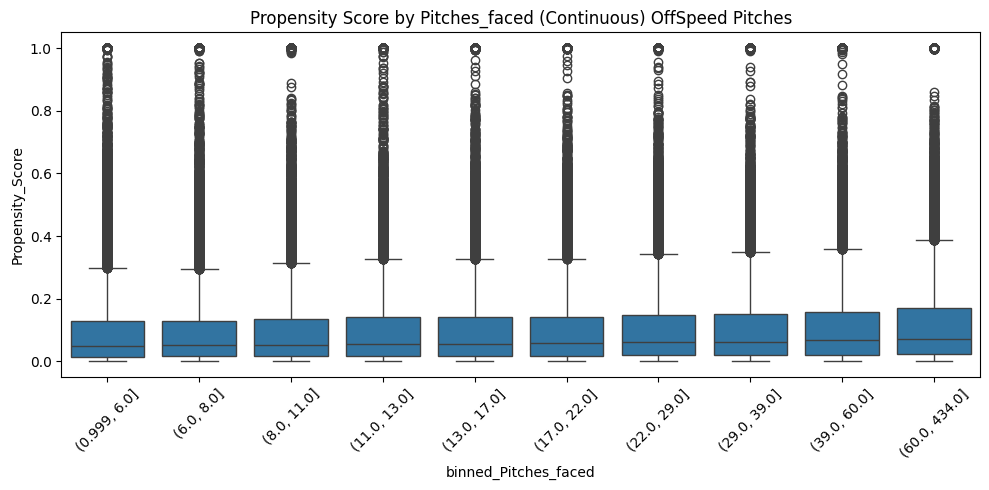

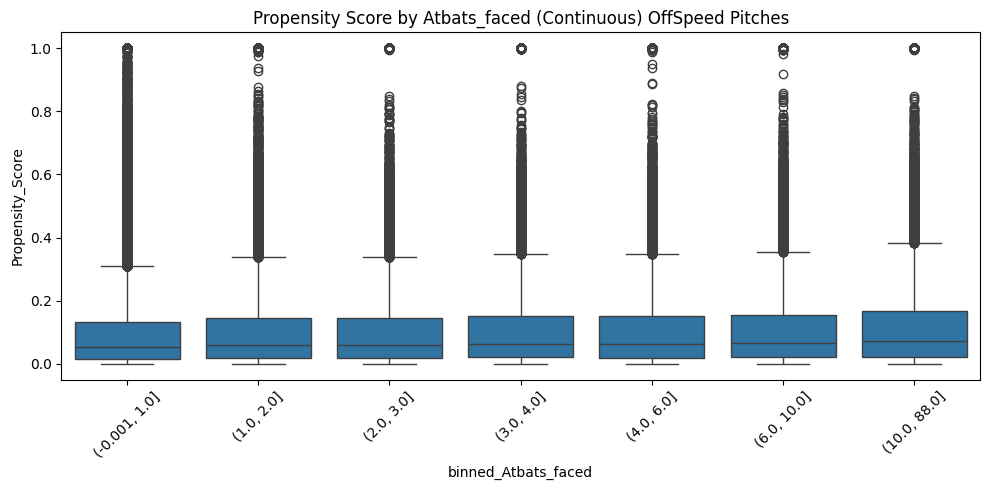

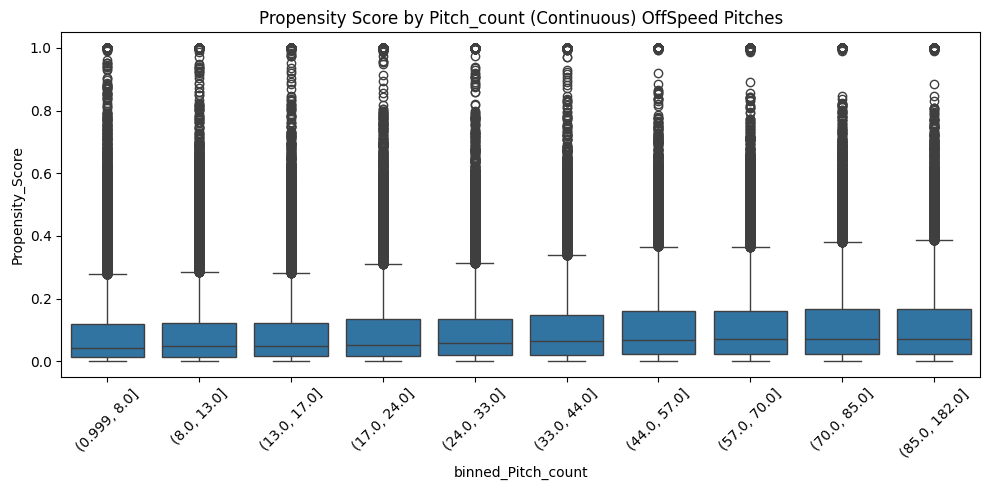

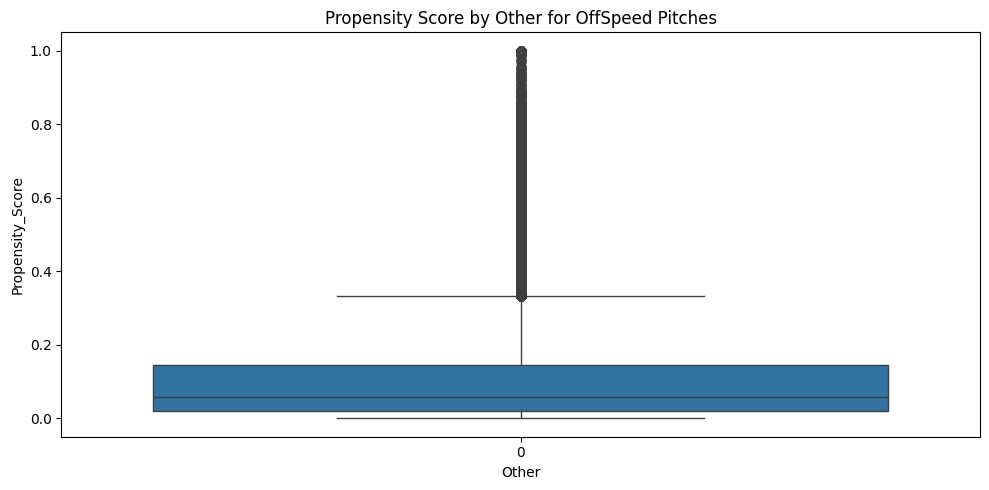

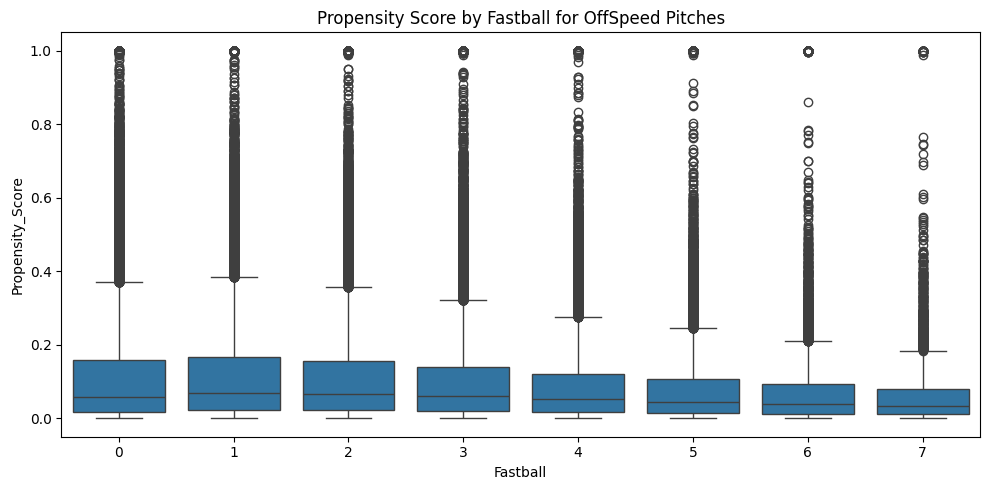

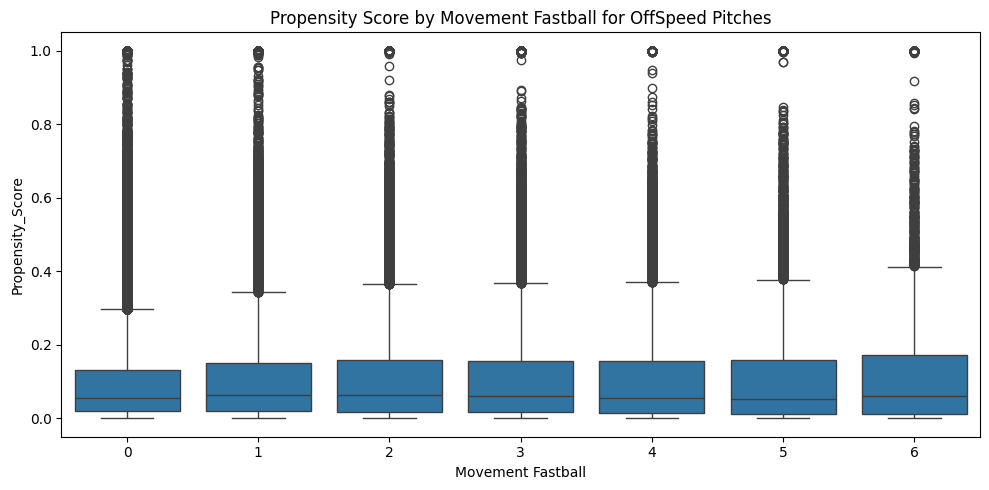

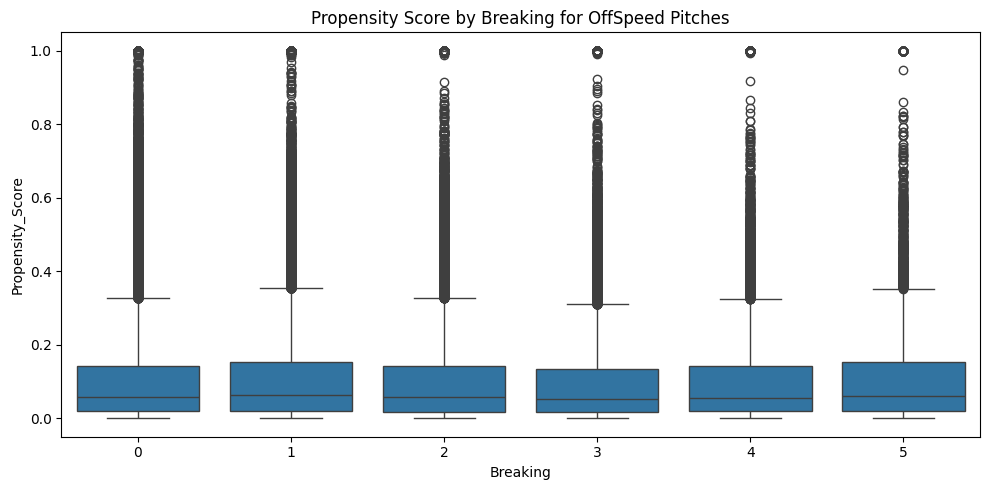

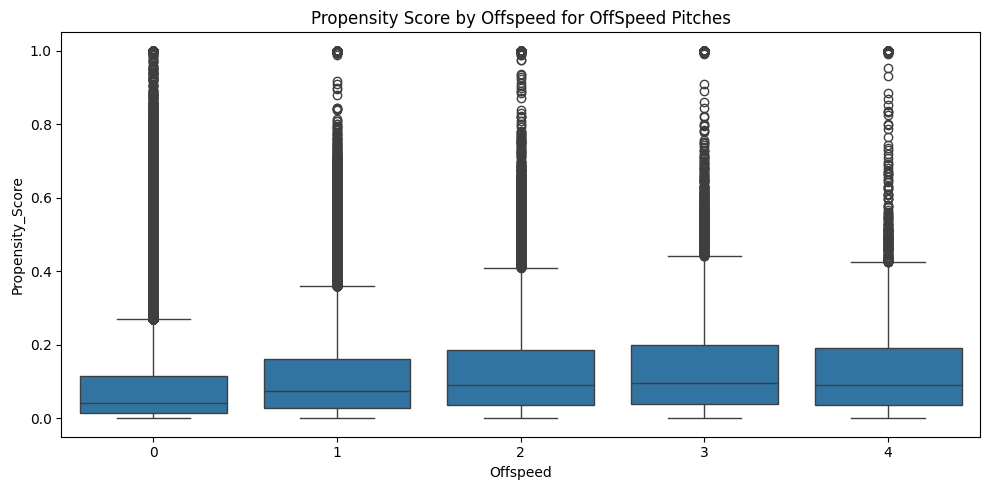

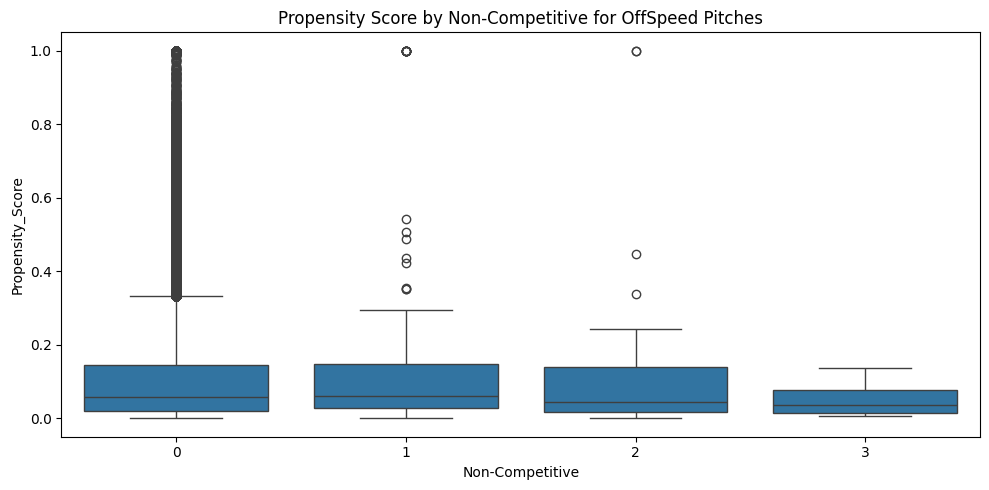

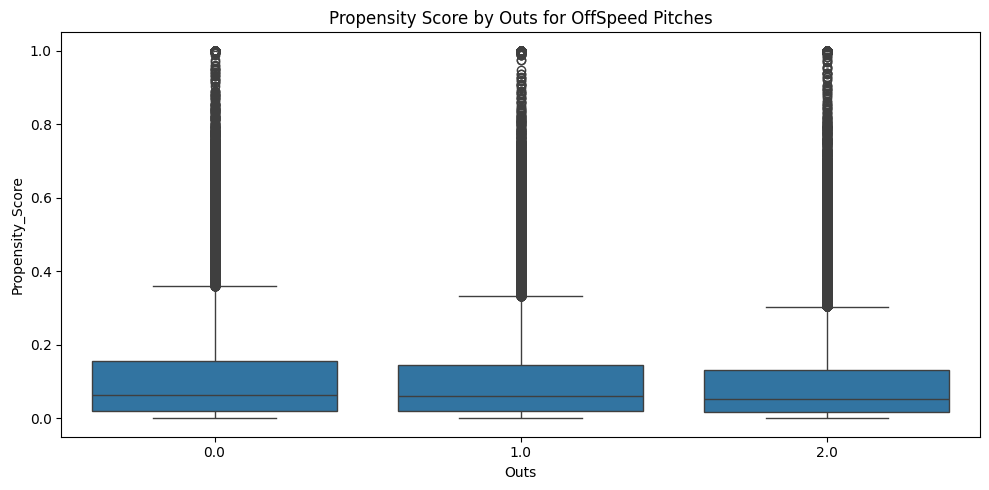

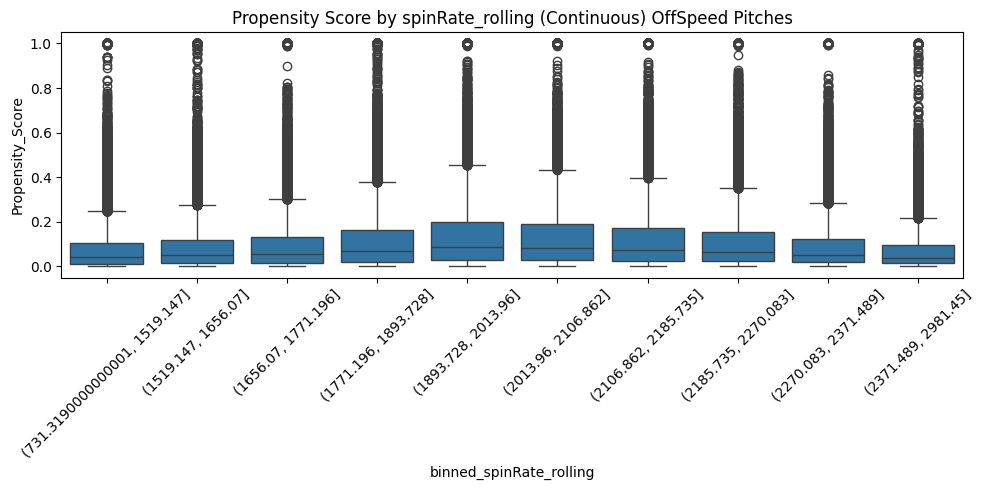

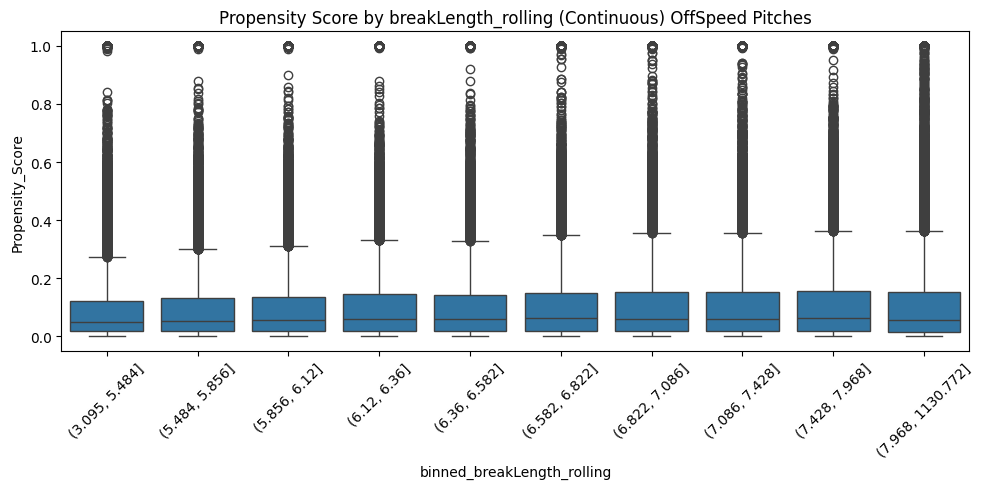

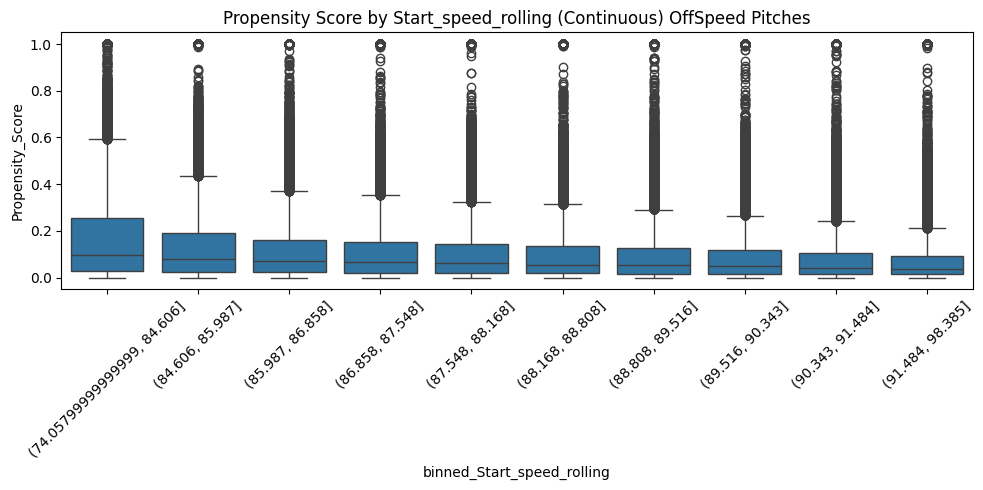

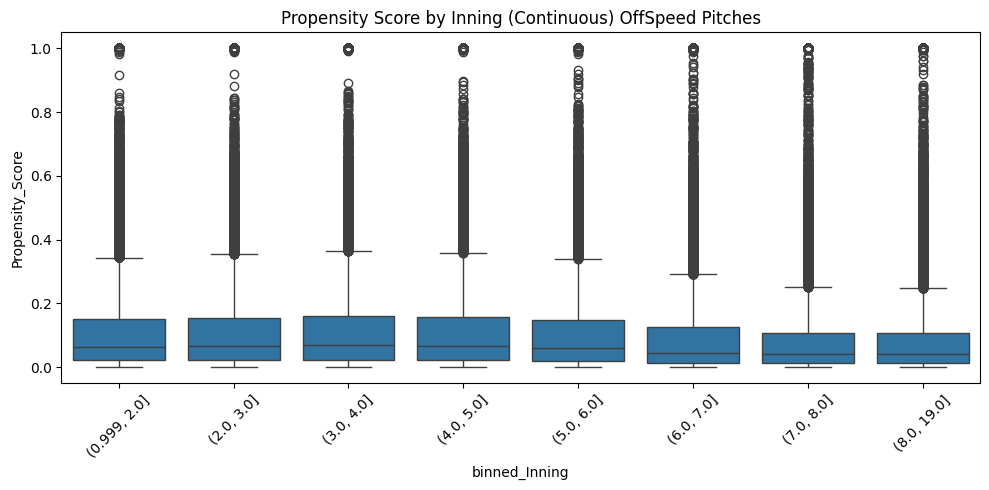

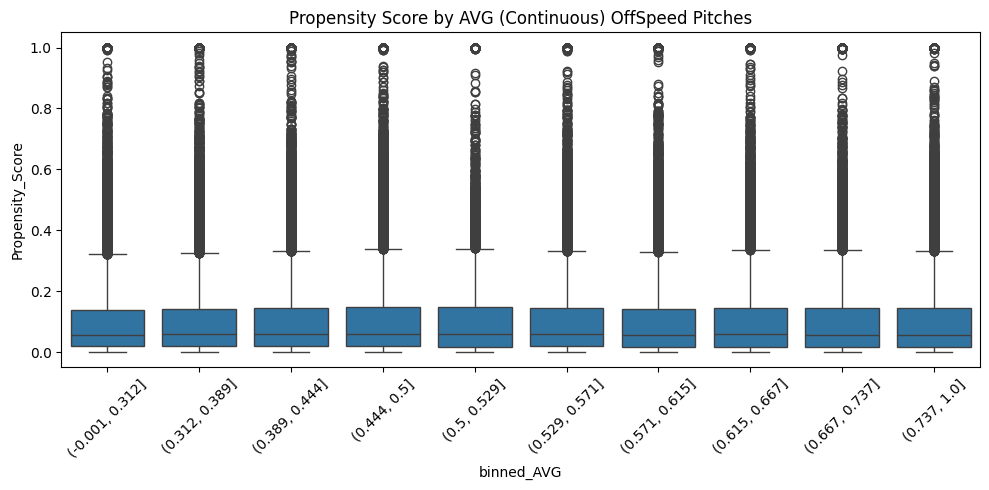

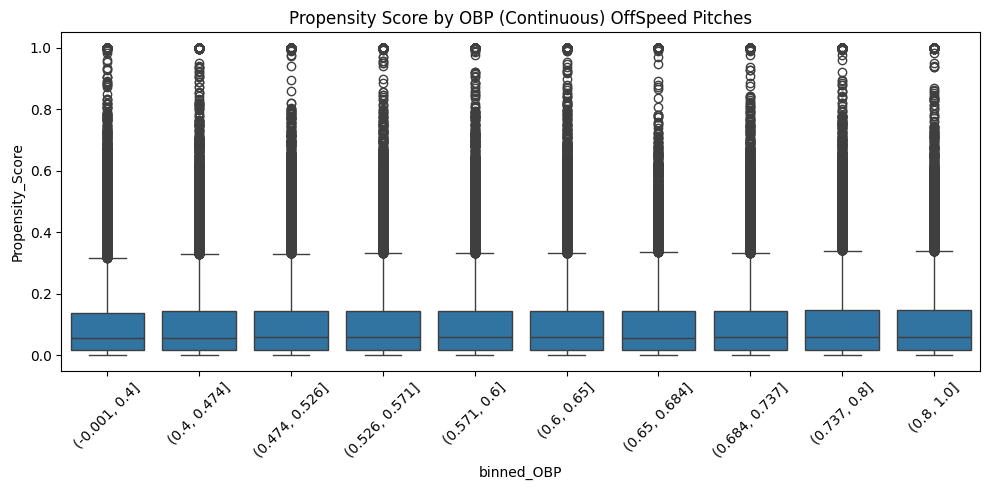

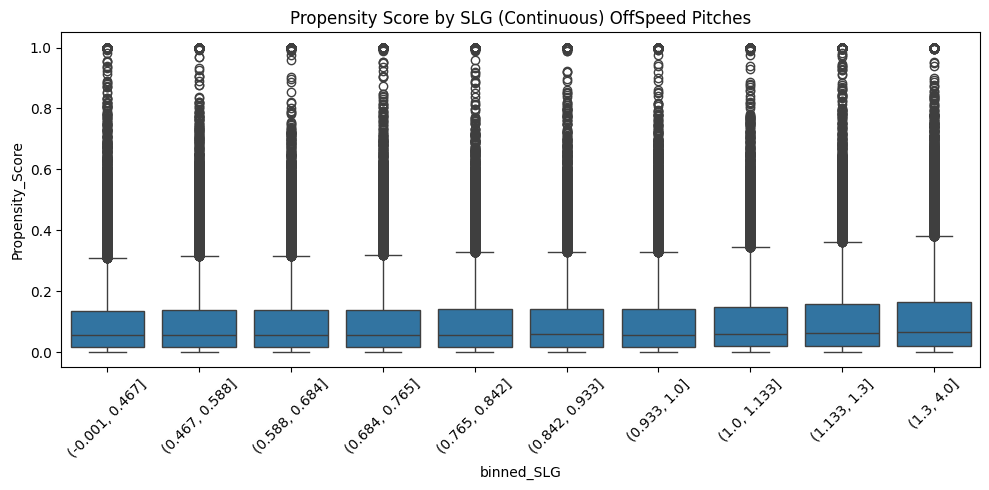

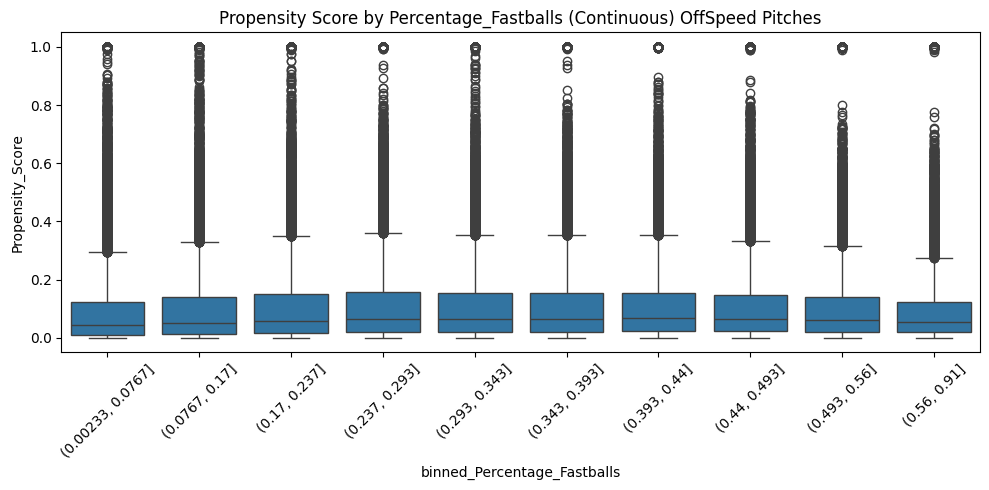

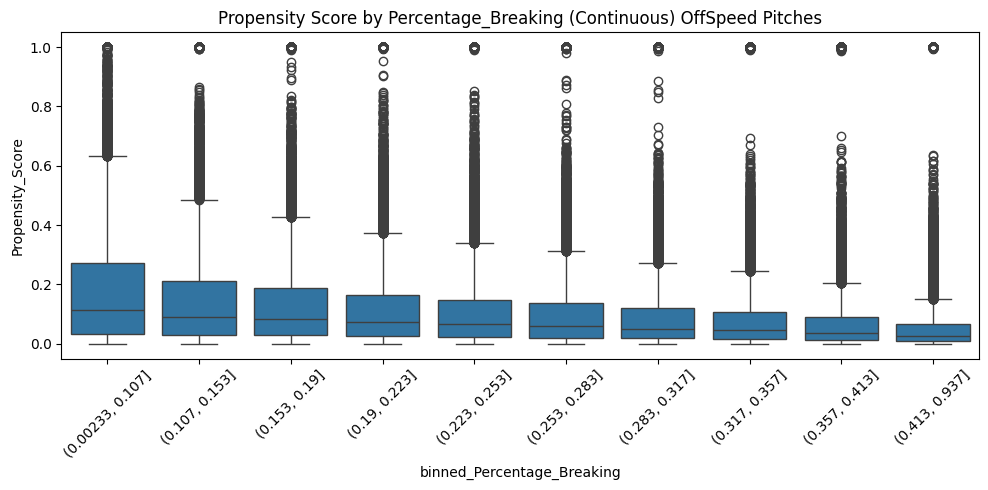

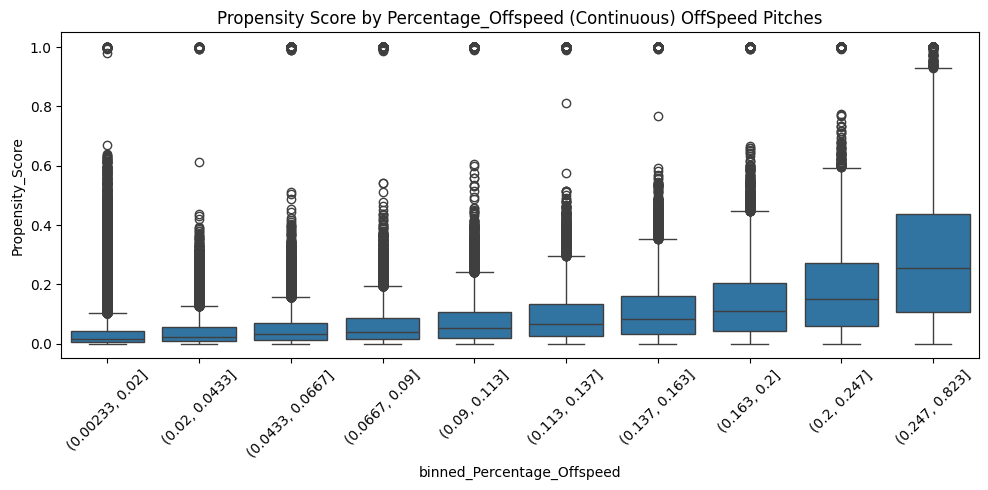

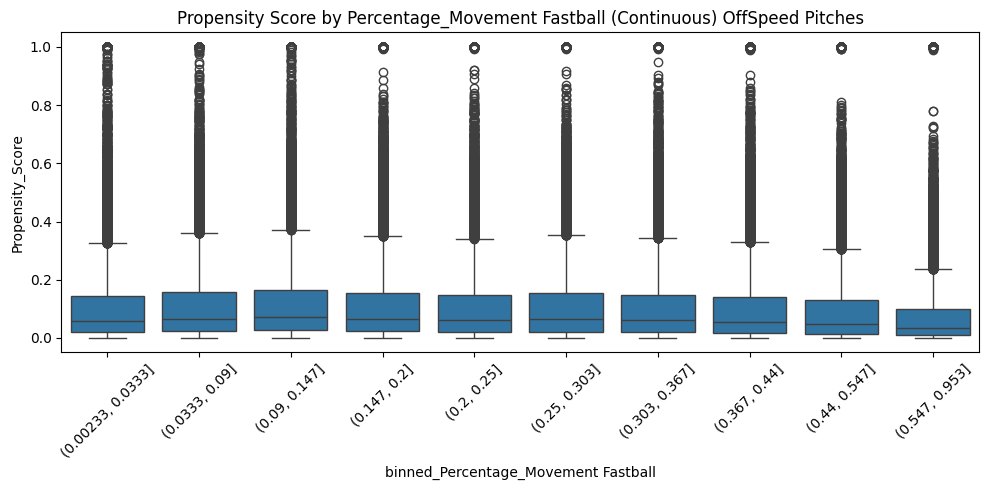

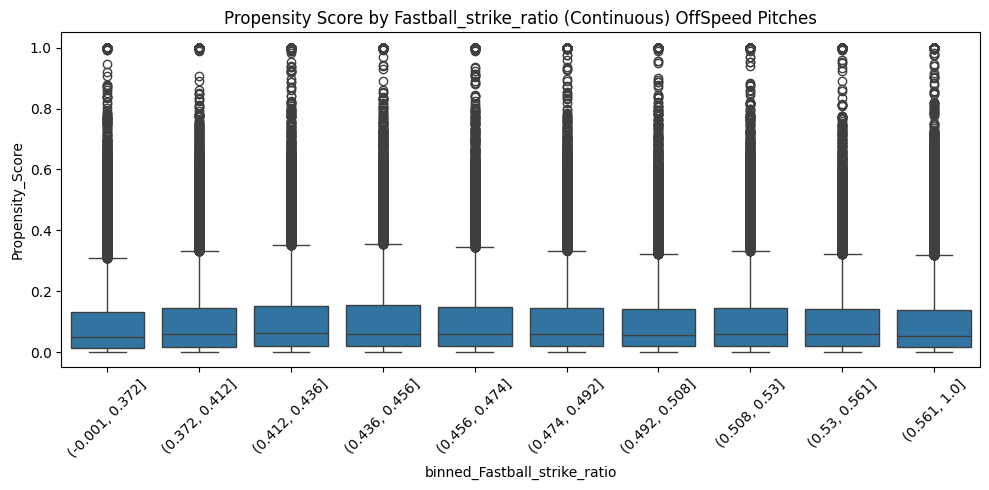

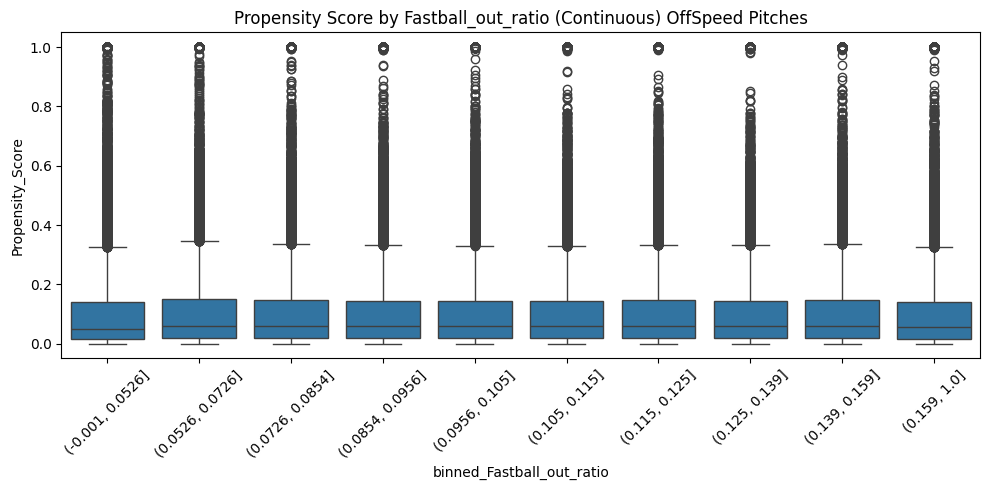

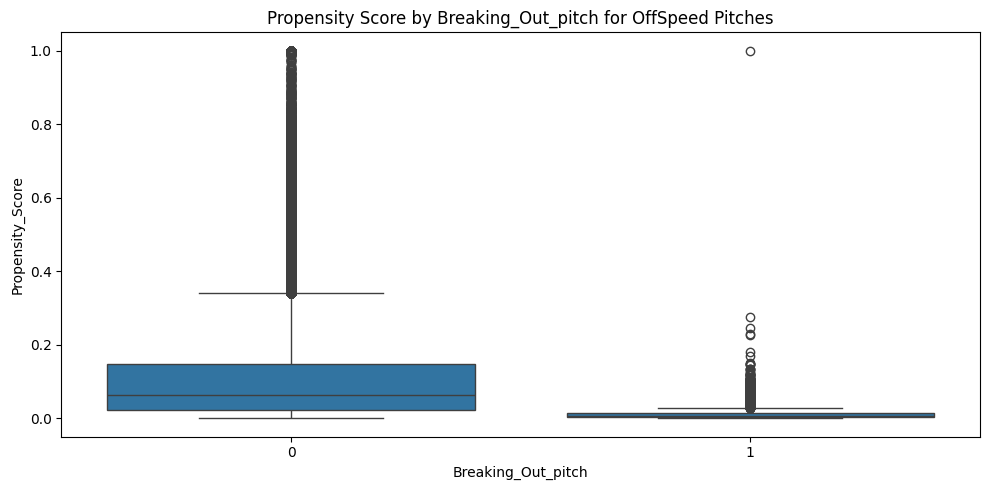

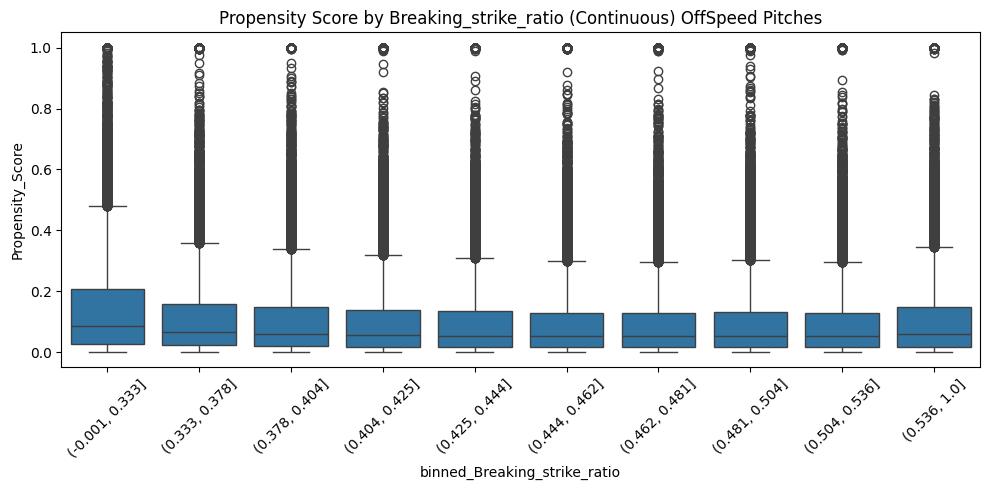

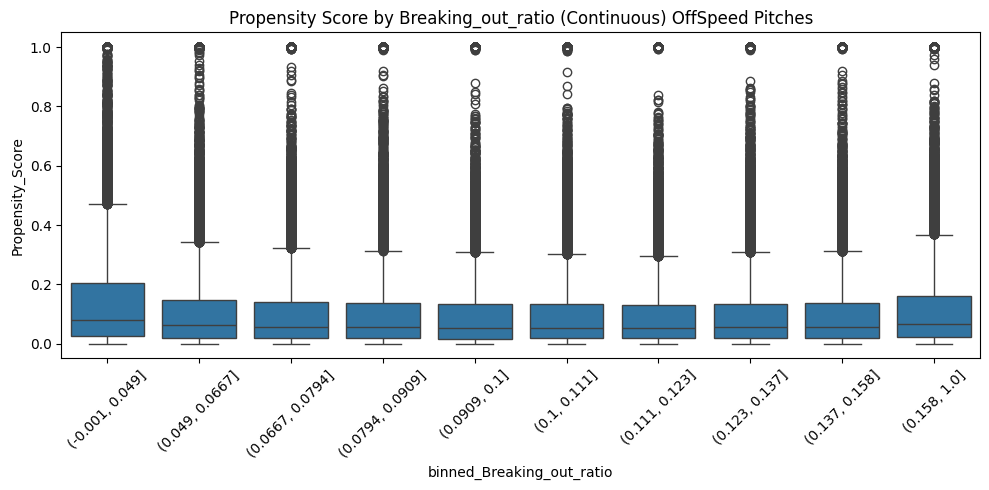

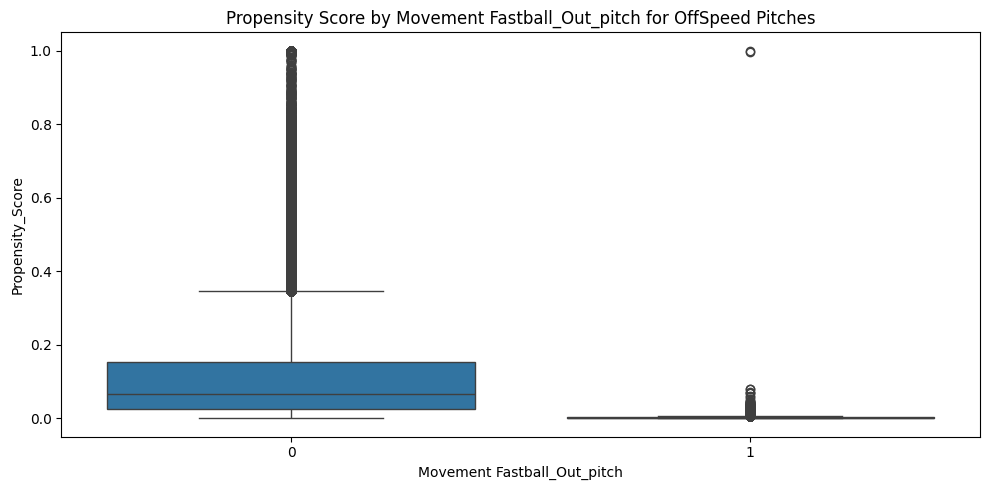

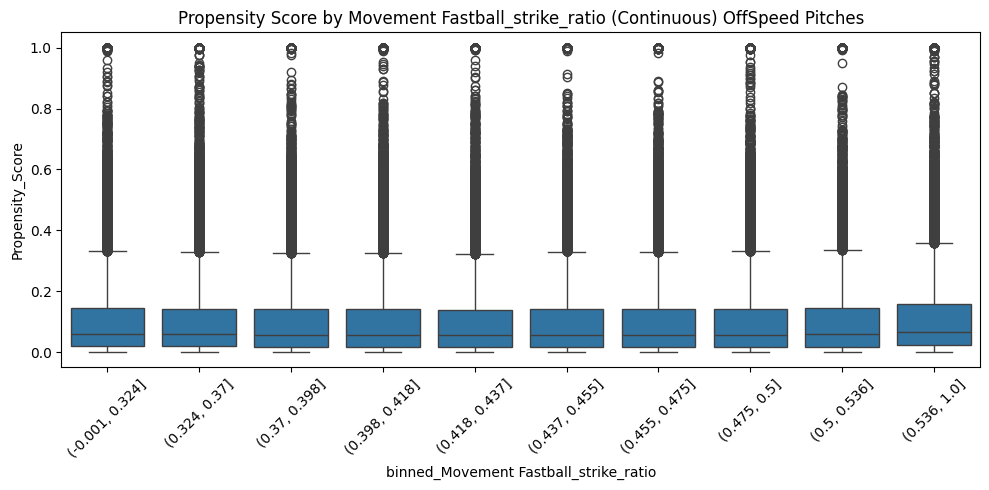

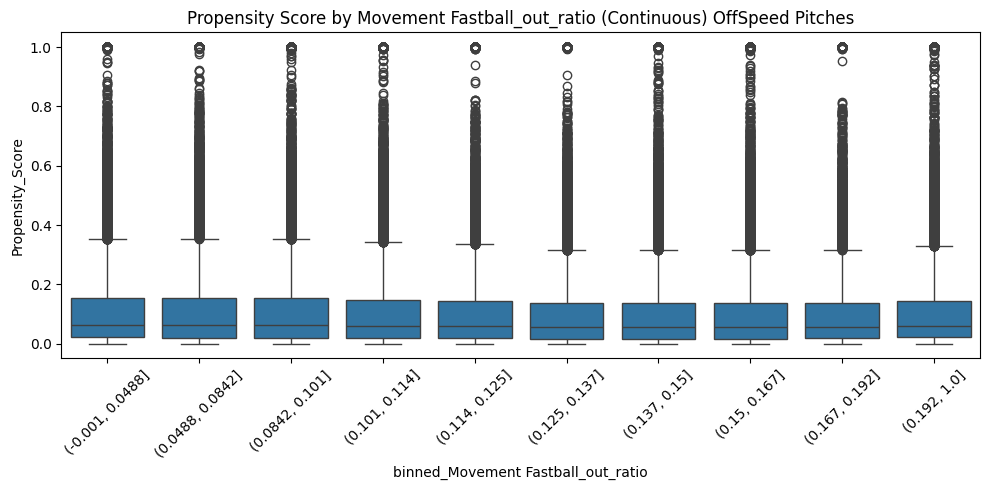

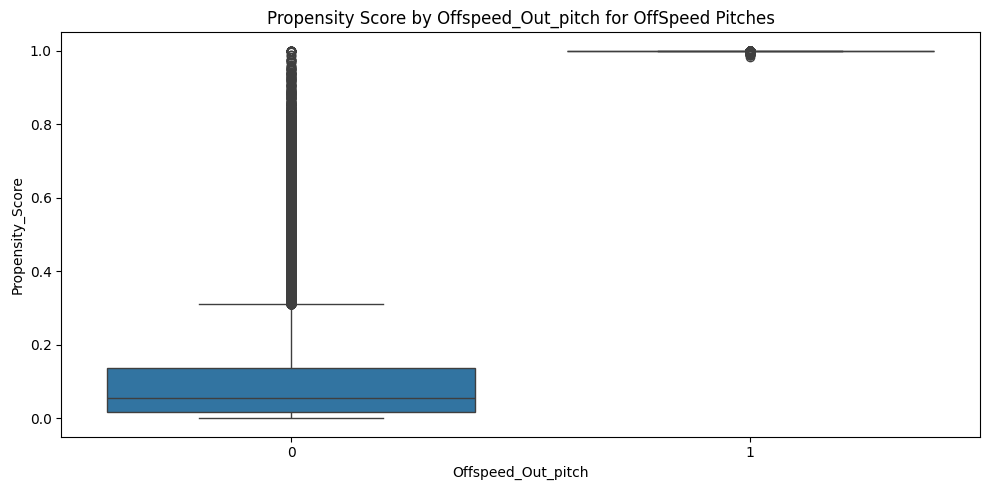

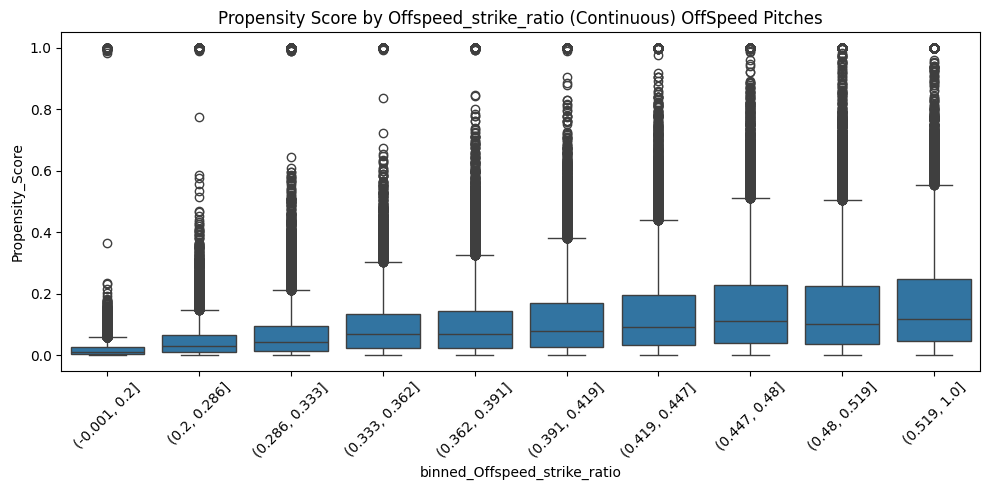

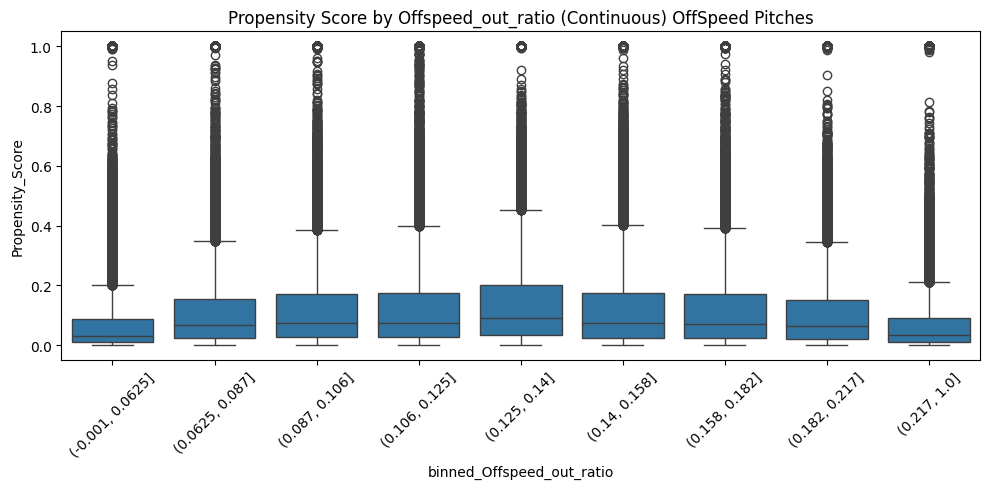

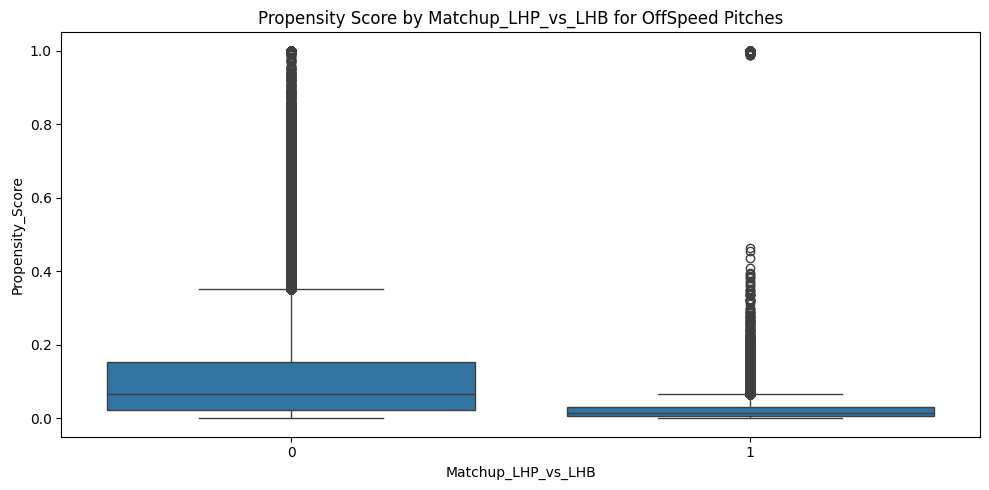

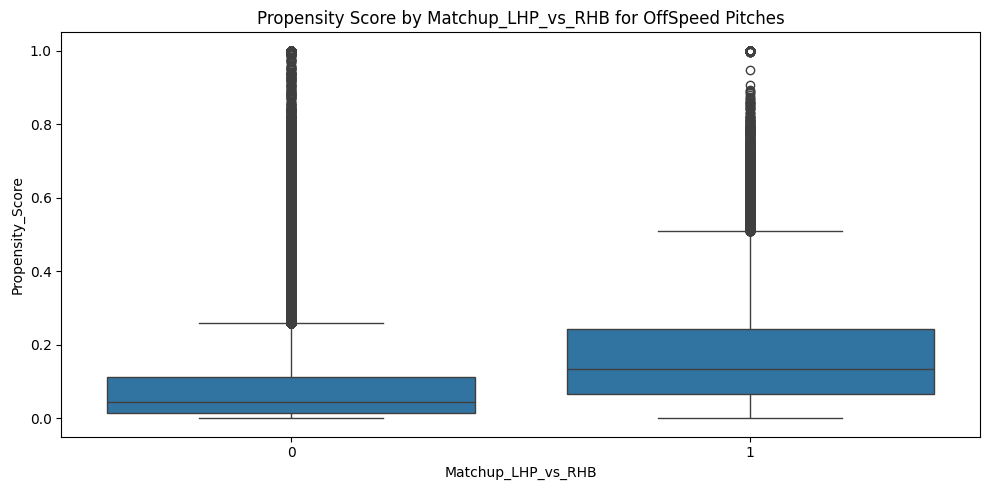

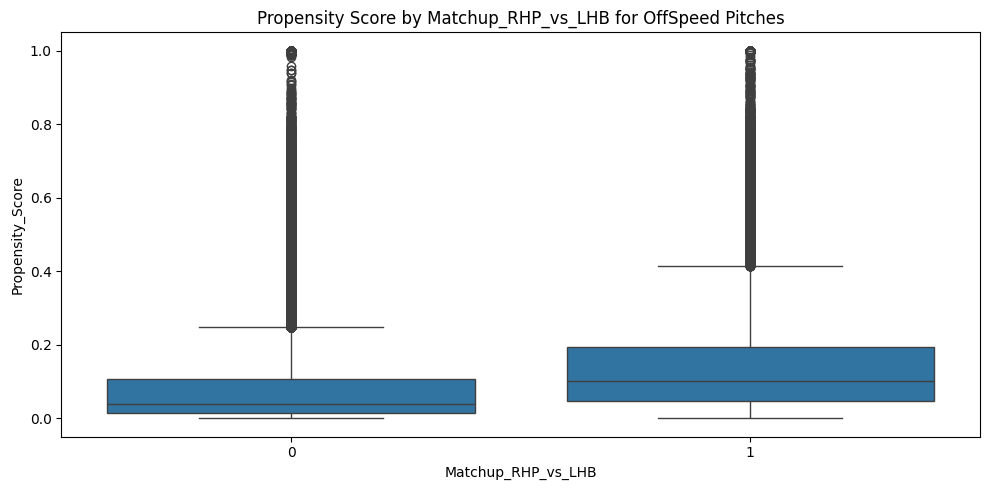

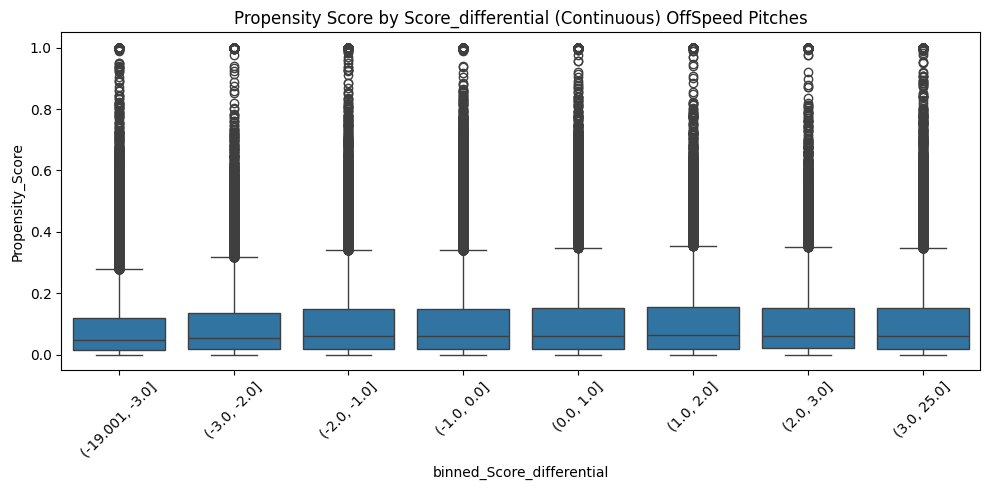

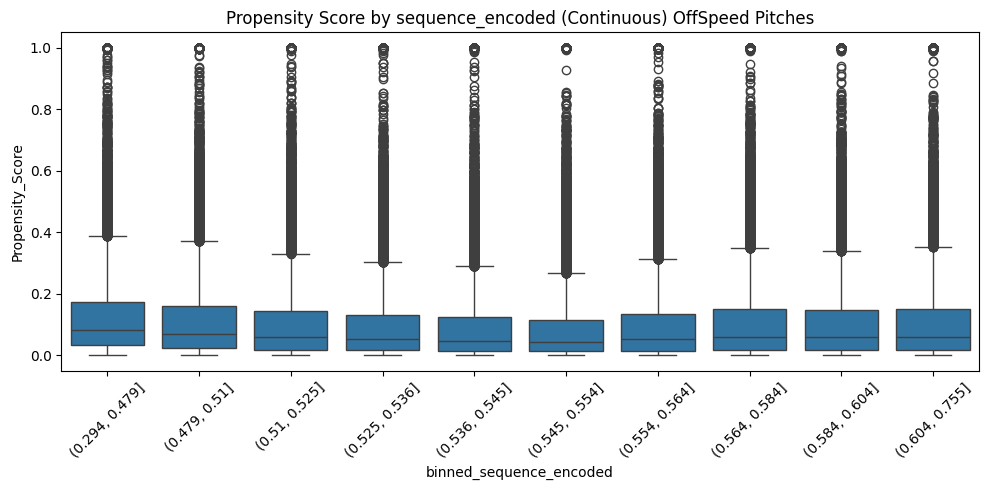

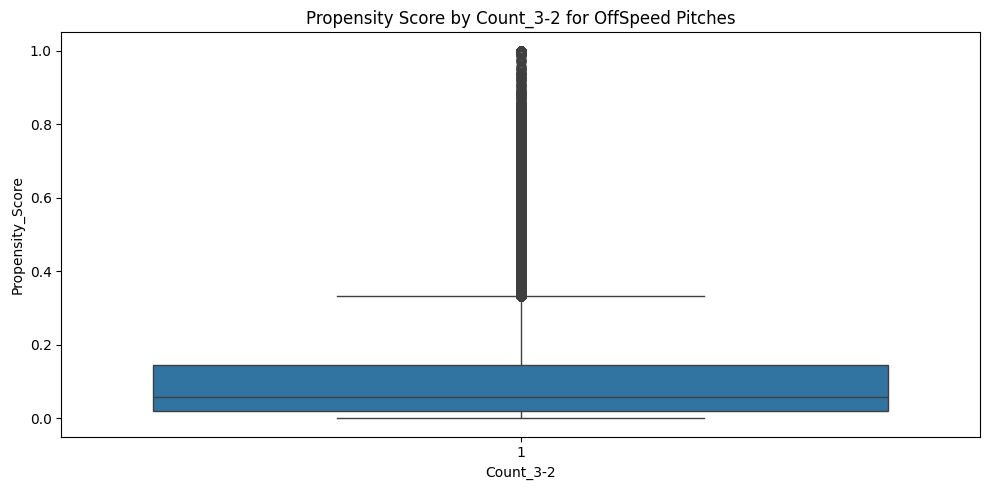

KeyError: 'binned_Prev_speed'

In [61]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# y is the binary treatment assignment (e.g., Fastball vs not)
y = test_df['Pitch_Offspeed']


covariates = X.columns.tolist()

covariates.remove('Propensity_Score')

for col in covariates:

    
    unique_vals = test_df[col].nunique()
    
    plt.figure(figsize=(10, 5))
    
    if unique_vals < 10:
        # Treat as categorical
        sns.boxplot(x=col, y='Propensity_Score', data=X)
        plt.title(f'Propensity Score by {col} for OffSpeed Pitches')
    
    else:
        # Treat as continuous and bin
        try:
            X[f'binned_{col}'] = pd.qcut(X[col], q=10, duplicates='drop')
            sns.boxplot(x=f'binned_{col}', y='Propensity_Score', data=X)
            plt.xticks(rotation=45)
            plt.title(f'Propensity Score by {col} (Continuous) OffSpeed Pitches')
        except ValueError:
            print(f"Skipping {col}: issue with binning (likely due to too many duplicates or NaNs)")
    
    plt.tight_layout()
    plt.show()


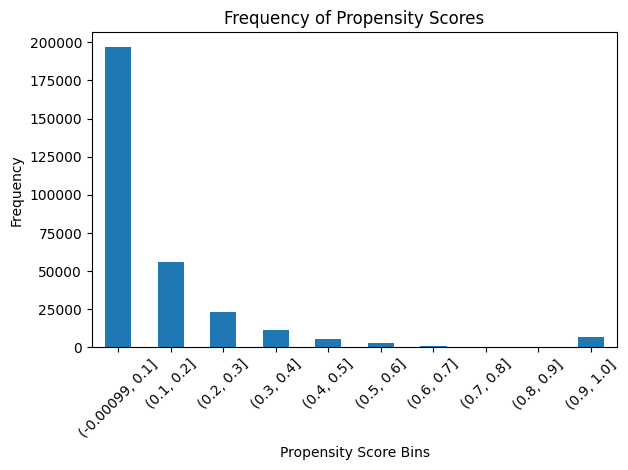

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Bin the scores into 10 equal-width intervals
X['score_bin'] = pd.cut(X['Propensity_Score'], bins=10)

# Count how many scores fall into each bin
score_counts = X['score_bin'].value_counts().sort_index()

# Plot
score_counts.plot(kind='bar')
plt.xlabel('Propensity Score Bins')
plt.ylabel('Frequency')
plt.title('Frequency of Propensity Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [60]:
X = test_df.drop(columns=['IsOut', 'Pitch_Breaking', 'Pitch_Fastball',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Distance_From_Center',  'End_Speed', 'Speed','Strike_pitch',
       'Swinging','Start_speed', 'breakAngle', 'breakLength',
       'spinRate','Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed',])

In [61]:
Y = total_df['IsOut']

T = total_df[['Pitch_Breaking']]

X = total_df.drop(columns=['IsOut', 'Pitch_Breaking', 'Pitch_Fastball',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Distance_From_Center',  'End_Speed', 'Speed','Strike_pitch',
       'Swinging','Start_speed', 'breakAngle', 'breakLength',
       'spinRate','Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed','sequence_encoded'])

In [62]:
X_columns = X = total_df.drop(columns=['IsOut', 'Pitch_Breaking', 'Pitch_Fastball',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Distance_From_Center',  'End_Speed', 'Speed','Strike_pitch',
       'Swinging','Start_speed', 'breakAngle', 'breakLength',
       'spinRate','Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed','sequence_encoded']).columns

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.utils import resample
import matplotlib.pyplot as plt
import time
from joblib import Parallel, delayed

# Simple OLS regression for baseline comparison
def run_ols_baseline(total_df):
    # Create X matrix with just the breaking ball variable and a constant
    X_simple = pd.DataFrame({'constant': 1, 'breaking_ball': total_df['Pitch_Breaking']})
    y = total_df['IsOut']
    
    # Fit OLS model
    ols_model = LinearRegression(fit_intercept=False)
    ols_model.fit(X_simple, y)
    
    # Extract coefficients
    baseline_prob = ols_model.coef_[0] 
    effect = ols_model.coef_[1] 
    
    print(f"Baseline out probability (non-breaking): {baseline_prob:.4f}")
    print(f"Effect of breaking ball (simple OLS): {effect:.4f}")
    print(f"Out probability with breaking ball: {baseline_prob + effect:.4f}")
    
    return baseline_prob, effect

# AIPW estimation function
def compute_aipw_estimate(df, X, T, Y, covariates):
    # Estimate propensity scores
    model = LogisticRegression(solver='lbfgs', max_iter=1000)
    model.fit(X, T)
    e_hat = model.predict_proba(X)[:, 1]  # P(T=1 | X)
    
    # Trim extreme propensity scores
    trim_idx = (e_hat > 0.05) & (e_hat < 0.95)
    if sum(~trim_idx) > 0:
        print(f"Trimming {sum(~trim_idx)} observations with extreme propensity scores")
    
    X_trimmed = X[trim_idx]
    T_trimmed = T[trim_idx]
    Y_trimmed = Y[trim_idx]
    e_hat_trimmed = e_hat[trim_idx]
    
    # Estimate potential outcomes
    treated_idx = T_trimmed == 1
    control_idx = T_trimmed == 0
    
    model_mu_1 = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    model_mu_0 = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    
    model_mu_1.fit(X_trimmed[treated_idx], Y_trimmed[treated_idx])
    model_mu_0.fit(X_trimmed[control_idx], Y_trimmed[control_idx])
    
    mu_1_hat = model_mu_1.predict(X_trimmed)
    mu_0_hat = model_mu_0.predict(X_trimmed)
    
    # Compute AIPW scores
    T_array = np.array(T_trimmed).flatten()
    Y_array = np.array(Y_trimmed)
    
    aipw_scores = (T_array * (Y_array - mu_1_hat) / e_hat_trimmed - 
                  (1 - T_array) * (Y_array - mu_0_hat) / (1 - e_hat_trimmed) + 
                  (mu_1_hat - mu_0_hat))
    
    # Estimate ATE
    ate = np.mean(aipw_scores)
    
    return ate, aipw_scores

# Full bootstrap function (to be run in parallel)
def single_bootstrap_iteration(i, total_df, X_columns, full=True):
    # Sample with replacement
    bootstrap_sample = resample(total_df, replace=True, n_samples=len(total_df))
    
    # Extract variables
    X_boot = bootstrap_sample[X_columns]
    T_boot = bootstrap_sample['Pitch_Breaking']
    Y_boot = bootstrap_sample['IsOut']
    
    if full:
        # Full re-estimation for each bootstrap sample
        ate_boot, _ = compute_aipw_estimate(bootstrap_sample, X_boot, T_boot, Y_boot, X_columns)
        return ate_boot
    else:
        # Simplified bootstrap (just resampling TEs)
        return np.mean(resample(original_aipw_scores, replace=True, n_samples=len(original_aipw_scores)))

# Main function to run everything
def run_analysis(total_df, X_columns, n_bootstrap=500, parallel=True, n_jobs=4):
    start_time = time.time()
    
    # First get baseline comparison from OLS
    baseline_prob, simple_effect = run_ols_baseline(total_df)
    
    # Extract variables for AIPW
    X = total_df[X_columns]
    T = total_df['Pitch_Breaking']
    Y = total_df['IsOut']
    
    # Initial AIPW estimate
    print("\nComputing initial AIPW estimate...")
    ate, original_aipw_scores = compute_aipw_estimate(total_df, X, T, Y, X_columns)
    print(f"AIPW Average Treatment Effect: {ate:.4f}")
    
    # Full bootstrap for confidence intervals
    print(f"\nPerforming {n_bootstrap} bootstrap iterations for confidence intervals...")
    
    if parallel:
        # Parallel processing for bootstrap
        bootstrap_results = Parallel(n_jobs=n_jobs)(
            delayed(single_bootstrap_iteration)(i, total_df, X_columns) 
            for i in range(n_bootstrap)
        )
    else:
        # Sequential processing
        bootstrap_results = []
        for i in range(n_bootstrap):
            if i % 10 == 0:
                print(f"Bootstrap iteration {i}/{n_bootstrap}")
            bootstrap_results.append(single_bootstrap_iteration(i, total_df, X_columns))
    
    # Calculate confidence intervals
    bootstrap_results = np.array(bootstrap_results)
    ci_lower = np.percentile(bootstrap_results, 2.5)
    ci_upper = np.percentile(bootstrap_results, 97.5)
    
    print(f"AIPW ATE: {ate:.4f}")
    print(f"95% CI from full bootstrap: [{ci_lower:.4f}, {ci_upper:.4f}]")
    
    # Plot bootstrap distribution
    plt.figure(figsize=(10, 6))
    plt.hist(bootstrap_results, bins=30, alpha=0.7)
    plt.axvline(ate, color='red', linestyle='--', label=f'Original ATE: {ate:.4f}')
    plt.axvline(ci_lower, color='green', linestyle='--', label=f'2.5%: {ci_lower:.4f}')
    plt.axvline(ci_upper, color='green', linestyle='--', label=f'97.5%: {ci_upper:.4f}')
    plt.title('Bootstrap Distribution of AIPW Treatment Effect Estimates')
    plt.xlabel('Treatment Effect')
    plt.ylabel('Frequency')
    plt.legend()
    
    execution_time = time.time() - start_time
    print(f"\nExecution time: {execution_time:.2f} seconds")
    
    return ate, (ci_lower, ci_upper), bootstrap_results

# Example usage
# Assuming total_df contains your data and X_columns is a list of your covariates
run_analysis(total_df, X_columns, n_bootstrap=500, parallel=True, n_jobs=4)

Baseline out probability (non-breaking): 0.5431
Effect of breaking ball (simple OLS): 0.0157
Out probability with breaking ball: 0.5588

Computing initial AIPW estimate...
Trimming 925 observations with extreme propensity scores
AIPW Average Treatment Effect: 0.0262

Performing 500 bootstrap iterations for confidence intervals...


In [62]:
import numpy as np
from econml.dml import LinearDML
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


est = LinearDML(
    model_y=RandomForestRegressor(),
    model_t=RandomForestClassifier(),
    linear_first_stages=False,
    discrete_treatment=True,
    random_state=42
)

# Fit the model
est.fit(Y, T, X=X, W=X)

# Estimate treatment effect
te = est.effect(X)


Co-variance matrix is underdetermined. Inference will be invalid!


In [63]:
np.mean(te)

0.019418471365772096

In [113]:
Y = total_df['IsOut']

T = total_df[['Pitch_Breaking']]

X = total_df.drop(columns=['IsOut', 'Pitch_Breaking', 'Pitch_Fastball',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Distance_From_Center',  'End_Speed', 'Speed','Strike_pitch',
       'Swinging','Start_speed', 'breakAngle', 'breakLength',
       'spinRate','Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed',])

covariates = ['IsOut', 'Pitch_Breaking', 'Pitch_Fastball',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Distance_From_Center',  'End_Speed', 'Speed','Strike_pitch',
       'Swinging','Start_speed', 'breakAngle', 'breakLength',
       'spinRate','Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed']

In [121]:
test_df['Pitch_Movement Fastball']

2012        0
2199        0
2200        0
2436        0
2437        0
           ..
10404351    0
10404352    0
10404398    0
10404399    0
10404400    0
Name: Pitch_Movement Fastball, Length: 324527, dtype: int64

In [122]:
test_df.rename(columns={'Pitch_Movement Fastball': 'Pitch_Movement_Fastball'}, inplace=True)


In [116]:
# Step 1: Estimate propensity scores e(X)
propensity_model = RandomForestClassifier()
propensity_model.fit(X, T)
e_hat = propensity_model.predict_proba(X)[:, 1]  # P(T=1 | X)

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_31067/3790087004.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [123]:
import statsmodels.formula.api as smf

# Fit a simple unadjusted logit model
model = smf.logit("IsOut ~ Pitch_Movement_Fastball", data=test_df).fit()

# View results
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.689070
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  IsOut   No. Observations:               324527
Model:                          Logit   Df Residuals:                   324525
Method:                           MLE   Df Model:                            1
Date:                Sun, 04 May 2025   Pseudo R-squ.:               6.389e-06
Time:                        17:42:05   Log-Likelihood:            -2.2362e+05
converged:                       True   LL-Null:                   -2.2362e+05
Covariance Type:            nonrobust   LLR p-value:                   0.09095
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.1847      0.004     44.090      0.000       0.176   

In [124]:
import numpy as np

# Get parameter estimates and covariance matrix
intercept = model.params['Intercept']
coef = model.params['Pitch_Movement_Fastball']
cov = model.cov_params()

# Compute predicted probabilities
p0 = 1 / (1 + np.exp(-intercept))                      # P(out | no fastball)
p1 = 1 / (1 + np.exp(-(intercept + coef)))             # P(out | fastball)
diff = p1 - p0

# Compute gradients (chain rule for delta method)
dp0_dint = p0 * (1 - p0)                     # ∂p0/∂intercept
dp1_dint = p1 * (1 - p1)                     # ∂p1/∂intercept
dp1_dcoef = p1 * (1 - p1)                    # ∂p1/∂coef

# Gradient vector of difference w.r.t [intercept, coef]
grad = np.array([dp1_dint - dp0_dint, dp1_dcoef])

# Covariance matrix for [intercept, coef]
cov_sub = cov.loc[['Intercept', 'Pitch_Movement_Fastball'], ['Intercept', 'Pitch_Movement_Fastball']]

# Delta method: variance of the difference
var_diff = grad.T @ cov_sub.values @ grad
se_diff = np.sqrt(var_diff)

# Print results
print(f"Base (no fastball): {p0:.3f}")
print(f"With fastball:     {p1:.3f}")
print(f"Difference:        {diff:.3f} ± {se_diff:.3f} (SE)")


Base (no fastball): 0.546
With fastball:     0.543
Difference:        -0.003 ± 0.002 (SE)


In [63]:
import statsmodels.api as sm

test_df = total_df.copy()

X = test_df.drop(columns=['IsOut', 'Pitch_Breaking',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Distance_From_Center',  'End_Speed', 'Speed','Strike_pitch',
       'Swinging','Start_speed', 'breakAngle', 'breakLength',
       'spinRate','Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed','Movement Fastball_Out_pitch', 'Breaking_Out_pitch', 'Offspeed_Out_pitch',
 'sequence_encoded', 'Count_3-2'])
X = sm.add_constant(X)  # adds intercept term
y = test_df['IsOut']

model = sm.Logit(y, X).fit()


Optimization terminated successfully.
         Current function value: 0.685263
         Iterations 4


In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  IsOut   No. Observations:               324527
Model:                          Logit   Df Residuals:                   324491
Method:                           MLE   Df Model:                           35
Date:                Thu, 01 May 2025   Pseudo R-squ.:                0.005532
Time:                        22:49:42   Log-Likelihood:            -2.2239e+05
converged:                       True   LL-Null:                   -2.2362e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.3170      0.168      1.890      0.059      -0.012       0.646
Prev_speed                         0.0011      0.001      1.503      0.133      -0.000       0.003
Pitches_faced                     -0.0043      0.000    -11.639      0.000      -0.005      -0.004
Atbats_faced                       0.0216      0.002     10.871      0.000       0.018       0.025
Pitch_count                     3.173e-05      0.000      0.245      0.807      -0.000       0.000
Other                              0.0314      0.019      1.687      0.092      -0.005       0.068
Fastball                           0.0342      0.002     14.376      0.000       0.030       0.039
Movement Fastball                  0.0777      0.002     32.465      0.000       0.073       0.082
Breaking                           0.0342      0.003     13.013      0.000       0.029       0.039
Offspeed                           0.0334      0.004      9.361      0.000       0.026       0.040
Non-Competitive                   -0.0981      0.085     -1.160      0.246      -0.264       0.068
Outs                               0.0516      0.004     11.911      0.000       0.043       0.060
spinRate_rolling                 1.81e-05   1.15e-05      1.574      0.116   -4.44e-06    4.06e-05
breakLength_rolling             4.215e-05      0.000      0.087      0.930      -0.001       0.001
Start_speed_rolling               -0.0065      0.002     -3.825      0.000      -0.010      -0.003
Inning                             0.0008      0.001      0.543      0.587      -0.002       0.004
AVG                                0.5694      0.069      8.252      0.000       0.434       0.705
OBP                               -0.9644      0.071    -13.652      0.000      -1.103      -0.826
SLG                               -0.0190      0.016     -1.206      0.228      -0.050       0.012
Percentage_Fastballs               0.4153      0.111      3.750      0.000       0.198       0.632
Percentage_Breaking                0.3124      0.110      2.828      0.005       0.096       0.529
Percentage_Offspeed                0.2440      0.114      2.137      0.033       0.020       0.468
Percentage_Movement Fastball       0.1588      0.109      1.452      0.147      -0.056       0.373
Fastball_strike_ratio              0.1057      0.036      2.935      0.003       0.035       0.176
Fastball_out_ratio                -0.0745      0.062     -1.198      0.231      -0.196       0.047
Breaking_strike_ratio              0.0322      0.046      0.706      0.480      -0.057       0.121
Breaking_out_ratio                -0.0508      0.079     -0.641      0.522      -0.206       0.105
Movement Fastball_strike_ratio     0.0359      0.029      1.221      0.222      -0.022       0.093
Movement Fastball_out_ratio       -0.0119      0.046     -0.257      0.797      -0.103       0.079
Offspeed_strike_ratio              0.0623      0.026      2.384      0.01

In [65]:
intercept = model.params['const']
coef = model.params['Pitch_Fastball']

p0 = 1 / (1 + np.exp(-intercept))            # P(out | no fastball)
p1 = 1 / (1 + np.exp(-(intercept + coef)))   # P(out | fastball)

print(f"Base (no fastball): {p0:.3f}")
print(f"With fastball:     {p1:.3f}")
print(f"Difference:        {p1 - p0:.3f}")

Base (no fastball): 0.579
With fastball:     0.555
Difference:        -0.023


In [66]:
import numpy as np

# Get parameter estimates and covariance matrix
intercept = model.params['const']
coef = model.params['Pitch_Fastball']
cov = model.cov_params()

# Compute predicted probabilities
p0 = 1 / (1 + np.exp(-intercept))                      # P(out | no fastball)
p1 = 1 / (1 + np.exp(-(intercept + coef)))             # P(out | fastball)
diff = p1 - p0

# Compute gradients (chain rule for delta method)
dp0_dint = p0 * (1 - p0)                     # ∂p0/∂intercept
dp1_dint = p1 * (1 - p1)                     # ∂p1/∂intercept
dp1_dcoef = p1 * (1 - p1)                    # ∂p1/∂coef

# Gradient vector of difference w.r.t [intercept, coef]
grad = np.array([dp1_dint - dp0_dint, dp1_dcoef])

# Covariance matrix for [intercept, coef]
cov_sub = cov.loc[['const', 'Pitch_Fastball'], ['const', 'Pitch_Fastball']]

# Delta method: variance of the difference
var_diff = grad.T @ cov_sub.values @ grad
se_diff = np.sqrt(var_diff)

# Print results
print(f"Base (no fastball): {p0:.3f}")
print(f"With fastball:     {p1:.3f}")
print(f"Difference:        {diff:.3f} ± {se_diff:.3f} (SE)")


Base (no fastball): 0.579
With fastball:     0.555
Difference:        -0.023 ± 0.002 (SE)


In [67]:
import statsmodels.api as sm

X = test_df.drop(columns=['IsOut', 'Pitch_Breaking',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Fastball',
       'Pitch_Other', 'Distance_From_Center',  'End_Speed', 'Speed','Strike_pitch',
       'Swinging','Start_speed', 'breakAngle', 'breakLength',
       'spinRate','Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed','Movement Fastball_Out_pitch', 'Breaking_Out_pitch', 'Offspeed_Out_pitch',
 'sequence_encoded', 'Count_3-2'])
X = sm.add_constant(X)  # adds intercept term
y = test_df['IsOut']

model = sm.Logit(y, X).fit()


Optimization terminated successfully.
         Current function value: 0.685448
         Iterations 4


In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  IsOut   No. Observations:               324527
Model:                          Logit   Df Residuals:                   324491
Method:                           MLE   Df Model:                           35
Date:                Thu, 01 May 2025   Pseudo R-squ.:                0.005264
Time:                        22:50:35   Log-Likelihood:            -2.2245e+05
converged:                       True   LL-Null:                   -2.2362e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2968      0.168      1.770      0.077      -0.032       0.625
Prev_speed                         0.0010      0.001      1.376      0.169      -0.000       0.002
Pitches_faced                     -0.0042      0.000    -11.544      0.000      -0.005      -0.004
Atbats_faced                       0.0215      0.002     10.826      0.000       0.018       0.025
Pitch_count                     7.904e-05      0.000      0.611      0.541      -0.000       0.000
Other                              0.0323      0.019      1.735      0.083      -0.004       0.069
Fastball                           0.0295      0.002     12.592      0.000       0.025       0.034
Movement Fastball                  0.0761      0.002     31.839      0.000       0.071       0.081
Breaking                           0.0301      0.003     11.582      0.000       0.025       0.035
Offspeed                           0.0323      0.004      9.024      0.000       0.025       0.039
Non-Competitive                   -0.0993      0.085     -1.175      0.240      -0.265       0.066
Outs                               0.0530      0.004     12.219      0.000       0.044       0.061
spinRate_rolling                1.761e-05   1.15e-05      1.532      0.126   -4.92e-06    4.01e-05
breakLength_rolling             3.662e-05      0.000      0.076      0.940      -0.001       0.001
Start_speed_rolling               -0.0064      0.002     -3.742      0.000      -0.010      -0.003
Inning                             0.0007      0.001      0.462      0.644      -0.002       0.003
AVG                                0.5645      0.069      8.183      0.000       0.429       0.700
OBP                               -0.9619      0.071    -13.619      0.000      -1.100      -0.824
SLG                               -0.0156      0.016     -0.991      0.321      -0.047       0.015
Percentage_Fastballs               0.3548      0.111      3.208      0.001       0.138       0.571
Percentage_Breaking                0.3442      0.110      3.116      0.002       0.128       0.561
Percentage_Offspeed                0.2131      0.115      1.856      0.063      -0.012       0.438
Percentage_Movement Fastball       0.1811      0.109      1.655      0.098      -0.033       0.396
Fastball_strike_ratio              0.0977      0.036      2.712      0.007       0.027       0.168
Fastball_out_ratio                -0.0850      0.062     -1.367      0.172      -0.207       0.037
Breaking_strike_ratio              0.0461      0.046      1.013      0.311      -0.043       0.135
Breaking_out_ratio                -0.0469      0.079     -0.592      0.554      -0.202       0.109
Movement Fastball_strike_ratio     0.0391      0.029      1.333      0.183      -0.018       0.097
Movement Fastball_out_ratio       -0.0135      0.046     -0.291      0.771      -0.104       0.077
Offspeed_strike_ratio              0.0624      0.026      2.386      0.01

In [69]:
intercept = model.params['const']
coef = model.params['Pitch_Offspeed']

p0 = 1 / (1 + np.exp(-intercept))            # P(out | no fastball)
p1 = 1 / (1 + np.exp(-(intercept + coef)))   # P(out | fastball)

print(f"Base (no fastball): {p0:.3f}")
print(f"With fastball:     {p1:.3f}")
print(f"Difference:        {p1 - p0:.3f}")

Base (no fastball): 0.574
With fastball:     0.585
Difference:        0.011


In [70]:
import numpy as np

# Get parameter estimates and covariance matrix
intercept = model.params['const']
coef = model.params['Pitch_Offspeed']
cov = model.cov_params()

# Compute predicted probabilities
p0 = 1 / (1 + np.exp(-intercept))                      # P(out | no fastball)
p1 = 1 / (1 + np.exp(-(intercept + coef)))             # P(out | fastball)
diff = p1 - p0

# Compute gradients (chain rule for delta method)
dp0_dint = p0 * (1 - p0)                     # ∂p0/∂intercept
dp1_dint = p1 * (1 - p1)                     # ∂p1/∂intercept
dp1_dcoef = p1 * (1 - p1)                    # ∂p1/∂coef

# Gradient vector of difference w.r.t [intercept, coef]
grad = np.array([dp1_dint - dp0_dint, dp1_dcoef])

# Covariance matrix for [intercept, coef]
cov_sub = cov.loc[['const', 'Pitch_Offspeed'], ['const', 'Pitch_Offspeed']]

# Delta method: variance of the difference
var_diff = grad.T @ cov_sub.values @ grad
se_diff = np.sqrt(var_diff)

# Print results
print(f"Base (no fastball): {p0:.3f}")
print(f"With fastball:     {p1:.3f}")
print(f"Difference:        {diff:.3f} ± {se_diff:.3f} (SE)")


Base (no fastball): 0.574
With fastball:     0.585
Difference:        0.011 ± 0.003 (SE)


In [79]:
Y = total_df['IsOut']

T = total_df[['Pitch_Offspeed']]

X = total_df.drop(columns=['IsOut', 'Pitch_Breaking', 'Pitch_Fastball',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Distance_From_Center',  'End_Speed', 'Speed','Strike_pitch',
       'Swinging','Start_speed', 'breakAngle', 'breakLength',
       'spinRate','Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed','sequence_encoded', 'Movement Fastball_Out_pitch', 'Breaking_Out_pitch', 'Offspeed_Out_pitch'])

covariates = ['IsOut', 'Pitch_Breaking', 'Pitch_Fastball',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Distance_From_Center',  'End_Speed', 'Speed','Strike_pitch',
       'Swinging','Start_speed', 'breakAngle', 'breakLength',
       'spinRate','Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed']

/Users/evanbruno/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/evanbruno/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


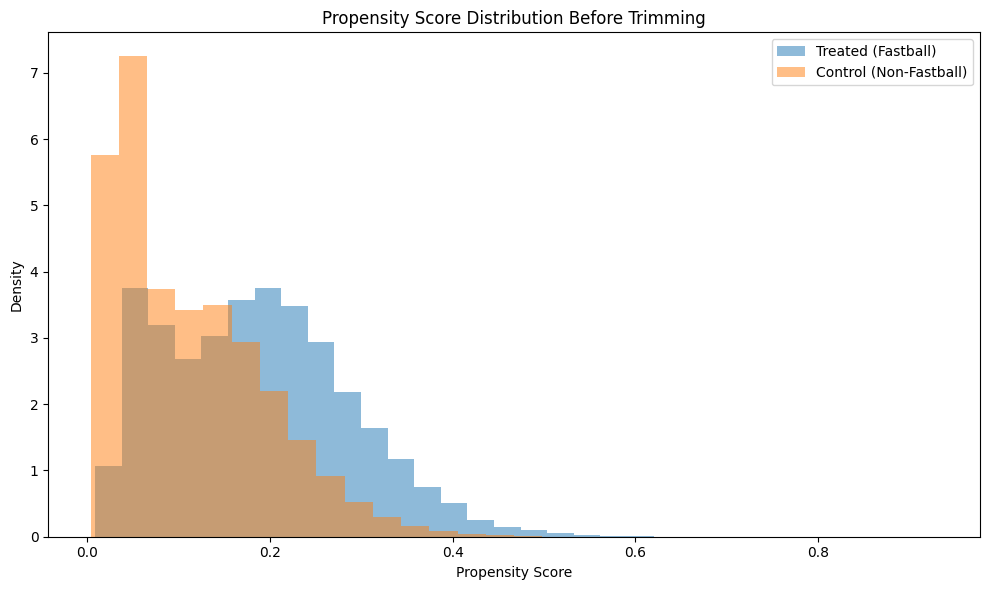

Trimming removed 91526 observations (28.20% of data)


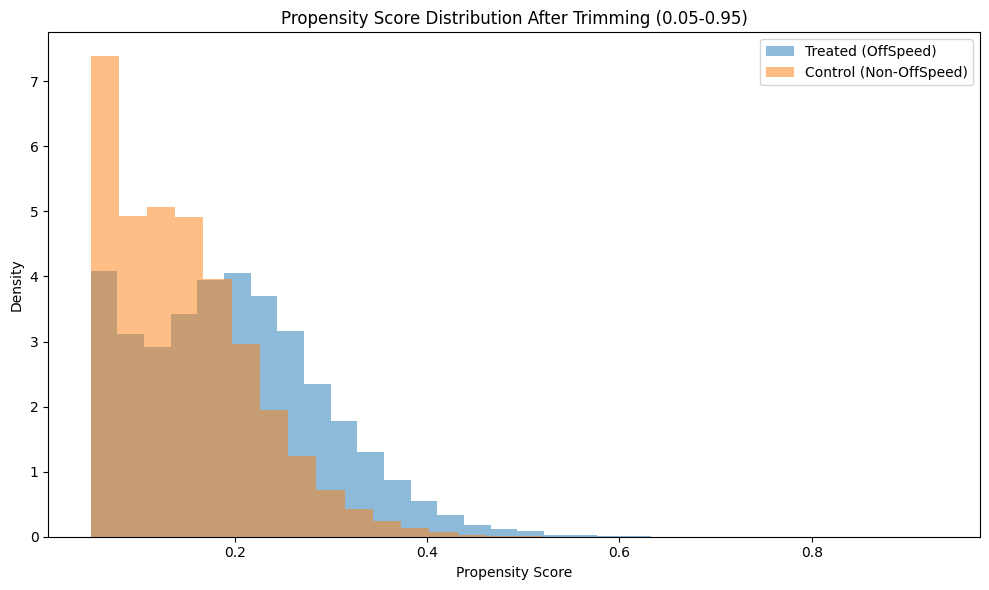

AIPW Estimated ATE (after 0.05-0.95 trimming): 0.0033
Bootstrap Standard Error: 0.0016
95% Confidence Interval: (0.0002, 0.0064)

Comparison:
AIPW Estimated ATE (without trimming): -0.0092
AIPW Estimated ATE STD (without trimming): 0.0015
AIPW Estimated ATE (with 0.05-0.95 trimming): 0.0033
Difference: 0.0125


In [80]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Step 1: Estimate propensity scores e(X)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X, T)
e_hat = model.predict_proba(X)[:, 1]  # P(T=1 | X)

# Visualize propensity score distribution before trimming
plt.figure(figsize=(10, 6))
plt.hist(e_hat[T['Pitch_Offspeed'] == 1], bins=30, alpha=0.5, label='Treated (Fastball)', density=True)
plt.hist(e_hat[T['Pitch_Offspeed'] == 0], bins=30, alpha=0.5, label='Control (Non-Fastball)', density=True)
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.title('Propensity Score Distribution Before Trimming')
plt.legend()
plt.tight_layout()
plt.show()

# Step 1b: Apply propensity score trimming
# Define trimming thresholds (common choices are 0.1-0.9 or 0.05-0.95)
lower_threshold = 0.05
upper_threshold = 0.95

# Create trimming mask
trim_mask = (e_hat >= lower_threshold) & (e_hat <= upper_threshold)
print(f"Trimming removed {(~trim_mask).sum()} observations ({(~trim_mask).sum() / len(e_hat) * 100:.2f}% of data)")

# Apply trimming to all relevant data
X_trimmed = X[trim_mask]
T_trimmed = T[trim_mask]
Y_trimmed = Y[trim_mask]
e_hat_trimmed = e_hat[trim_mask]

# Visualize propensity score distribution after trimming
plt.figure(figsize=(10, 6))
plt.hist(e_hat_trimmed[T_trimmed['Pitch_Offspeed'] == 1], bins=30, alpha=0.5, label='Treated (OffSpeed)', density=True)
plt.hist(e_hat_trimmed[T_trimmed['Pitch_Offspeed'] == 0], bins=30, alpha=0.5, label='Control (Non-OffSpeed)', density=True)
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.title(f'Propensity Score Distribution After Trimming ({lower_threshold}-{upper_threshold})')
plt.legend()
plt.tight_layout()
plt.show()

# Step 2: Estimate potential outcomes μ₁(X) and μ₀(X) using trimmed data
model_mu_1 = RandomForestRegressor()
model_mu_0 = RandomForestRegressor()

# Filter data for treated and control groups
mask_treated = T_trimmed['Pitch_Offspeed'] == 1
mask_control = T_trimmed['Pitch_Offspeed'] == 0

# Extract features and outcomes for each group
x_1 = X_trimmed[mask_treated]
y_1 = Y_trimmed[mask_treated]
x_0 = X_trimmed[mask_control]
y_0 = Y_trimmed[mask_control]

# Fit outcome models
model_mu_1.fit(x_1, y_1)
model_mu_0.fit(x_0, y_0)

# Predict potential outcomes for all units
mu_1_hat = model_mu_1.predict(X_trimmed)
mu_0_hat = model_mu_0.predict(X_trimmed)

# Convert Pandas Series to numpy array if needed
T_calc = np.array(T_trimmed['Pitch_Offspeed'].tolist())
Y_calc = np.array(Y_trimmed)

# Step 3: Compute AIPW scores
aipw_scores = (T_calc * (Y_calc - mu_1_hat) / e_hat_trimmed - 
               (1 - T_calc) * (Y_calc - mu_0_hat) / (1 - e_hat_trimmed) + 
               (mu_1_hat - mu_0_hat))

# Step 4: Estimate ATE
ate_trimmed = np.mean(aipw_scores)

# Calculate standard error using bootstrap
def bootstrap_ate(n_bootstraps=1000):
    bootstrap_ates = []
    indices = np.arange(len(X_trimmed))
    
    for _ in range(n_bootstraps):
        # Sample with replacement
        boot_indices = np.random.choice(indices, size=len(indices), replace=True)
        
        # Extract bootstrap sample
        boot_T = T_calc[boot_indices]
        boot_Y = Y_calc[boot_indices]
        boot_e_hat = e_hat_trimmed[boot_indices]
        boot_mu_1 = mu_1_hat[boot_indices]
        boot_mu_0 = mu_0_hat[boot_indices]
        
        # Calculate AIPW for bootstrap sample
        boot_aipw = (boot_T * (boot_Y - boot_mu_1) / boot_e_hat - 
                    (1 - boot_T) * (boot_Y - boot_mu_0) / (1 - boot_e_hat) + 
                    (boot_mu_1 - boot_mu_0))
        
        bootstrap_ates.append(np.mean(boot_aipw))
    
    return bootstrap_ates

# Run bootstrap
bootstrap_results = bootstrap_ate(n_bootstraps=1000)
ate_se = np.std(bootstrap_results)

# Print results
print(f"AIPW Estimated ATE (after {lower_threshold}-{upper_threshold} trimming): {ate_trimmed:.4f}")
print(f"Bootstrap Standard Error: {ate_se:.4f}")
print(f"95% Confidence Interval: ({ate_trimmed - 1.96 * ate_se:.4f}, {ate_trimmed + 1.96 * ate_se:.4f})")

# For comparison, calculate ATE without trimming (using original code)
T_calc_original = np.array(T['Pitch_Offspeed'].tolist())
Y_calc_original = np.array(Y)

# Re-fit models on full data
model_mu_1_full = RandomForestRegressor()
model_mu_0_full = RandomForestRegressor()

x_1_full = X[T['Pitch_Offspeed'] == 1]
y_1_full = Y[T['Pitch_Offspeed'] == 1]
x_0_full = X[T['Pitch_Offspeed'] == 0]
y_0_full = Y[T['Pitch_Offspeed'] == 0]

model_mu_1_full.fit(x_1_full, y_1_full)
model_mu_0_full.fit(x_0_full, y_0_full)

mu_1_hat_full = model_mu_1_full.predict(X)
mu_0_hat_full = model_mu_0_full.predict(X)

# Compute AIPW scores without trimming
aipw_scores_original = (T_calc_original * (Y_calc_original - mu_1_hat_full) / e_hat - 
                        (1 - T_calc_original) * (Y_calc_original - mu_0_hat_full) / (1 - e_hat) + 
                        (mu_1_hat_full - mu_0_hat_full))

# Estimate ATE without trimming
ate_original = np.mean(aipw_scores_original)

pre_treat_std = np.sqrt(np.var(aipw_scores_original) / 324527)

print(f"\nComparison:")
print(f"AIPW Estimated ATE (without trimming): {ate_original:.4f}")
print(f"AIPW Estimated ATE STD (without trimming): {pre_treat_std:.4f}")
print(f"AIPW Estimated ATE (with {lower_threshold}-{upper_threshold} trimming): {ate_trimmed:.4f}")
print(f"Difference: {ate_trimmed - ate_original:.4f}")

In [99]:
X.columns

Index(['Prev_speed', 'Pitches_faced', 'Atbats_faced', 'Pitch_count', 'Other',
       'Fastball', 'Movement Fastball', 'Breaking', 'Offspeed',
       'Non-Competitive', 'Outs', 'spinRate_rolling', 'breakLength_rolling',
       'Start_speed_rolling', 'Inning', 'AVG', 'OBP', 'SLG',
       'Percentage_Fastballs', 'Percentage_Breaking', 'Percentage_Offspeed',
       'Percentage_Movement Fastball', 'Fastball_strike_ratio',
       'Fastball_out_ratio', 'Breaking_strike_ratio', 'Breaking_out_ratio',
       'Movement Fastball_strike_ratio', 'Movement Fastball_out_ratio',
       'Offspeed_strike_ratio', 'Offspeed_out_ratio', 'Matchup_LHP_vs_LHB',
       'Matchup_LHP_vs_RHB', 'Matchup_RHP_vs_LHB', 'Score_differential',
       'Count_3-2', 'TE', 'Trim_TE'],
      dtype='object')

In [82]:
X['TE'] = aipw_scores_original

In [84]:
np.mean(X.loc[X['Start_speed_rolling'] > 90]['TE'])

-0.020746168053613782

In [85]:
np.sqrt(np.std(X.loc[X['Start_speed_rolling'] > 90]['TE']) / len(X))

0.0016480102148432282

In [87]:
X['Trim_TE'] = ate_trimmed

In [101]:
np.mean(X.loc[X['Percentage_Fastballs'] > 0.5]['Trim_TE'])

0.003283268757643343

In [91]:
len(aipw_scores)

233001

In [93]:
X_trimmed['Trim_TE'] = aipw_scores

In [97]:
np.mean(X_trimmed.loc[X_trimmed['Start_speed_rolling'] > 90]['Trim_TE'])

-0.0055545043843185544

In [98]:
np.mean(X_trimmed.loc[X_trimmed['Breaking_strike_ratio'] > .5]['Trim_TE'])

0.0023066663977500245

In [106]:
np.mean(X_trimmed.loc[X_trimmed['Offspeed_strike_ratio'] > 0.5]['Trim_TE'])

0.011945332478523906

In [105]:
np.sqrt(np.std(X_trimmed.loc[X_trimmed['Offspeed_strike_ratio'] > 0.5]['Trim_TE']) / len(X_trimmed))




0.001881222782507062

In [77]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

test_df = total_df.copy()

# test_df = test_df.loc[test_df['spinRate_rolling'] > 2000]

# Features and binary treatment (1 = fastball, 0 = not fastball)
X = test_df.drop(columns=['IsOut', 'Pitch_Breaking', 'Pitch_Fastball',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Distance_From_Center',  'End_Speed', 'Speed','Strike_pitch',
       'Swinging','Start_speed', 'breakAngle', 'breakLength',
       'spinRate','Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed','Movement Fastball_Out_pitch', 'Breaking_Out_pitch', 'Offspeed_Out_pitch',
 'sequence_encoded'])
y = test_df["Pitch_Offspeed"]

# Fit binary logistic regression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X, y)

# Predict propensity scores (prob of being thrown a fastball)
gps_probs = model.predict_proba(X)[:, 1]  # Only prob of treatment = 1

X['Propensity_Score'] = gps_probs


# Inverse Probability Weights
ipw_weights = 1 / gps_probs
ipw_weights[y == 0] = 1 / (1 - gps_probs[y == 0])  # Fix for control group

# Optional: Stabilized Weights
treatment_probs = y.value_counts(normalize=True).sort_index().values
# treatment_probs[1] = P(T=1), treatment_probs[0] = P(T=0)

# Stabilized weights: numerator is marginal probability
stabilized_weights = np.where(
    y == 1,
    treatment_probs[1] / gps_probs,
    treatment_probs[0] / (1 - gps_probs)
)


/Users/evanbruno/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_21648/3836082833.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_21648/3836082833.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)


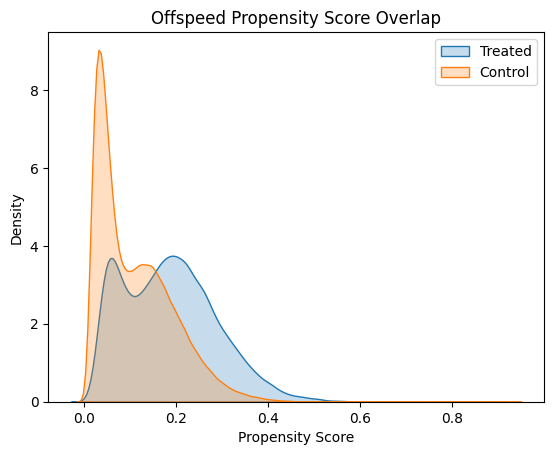

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

T_calc = np.array(test_df["Pitch_Offspeed"].tolist())

# Assuming T is a pandas Series or array of 0s and 1s
sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.title('Offspeed Propensity Score Overlap')
plt.legend()
plt.show()


/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15319/4272825754.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15319/4272825754.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)


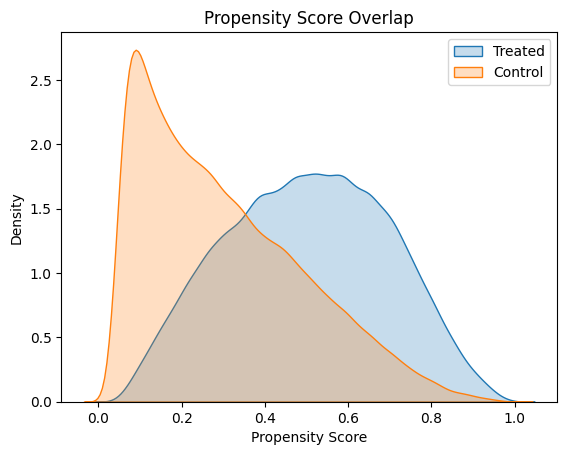

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

T_calc = np.array(test_df["Pitch_Fastball"].tolist())

# Assuming T is a pandas Series or array of 0s and 1s
sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.title('Propensity Score Overlap')
plt.legend()
plt.show()


/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15319/3739437442.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15319/3739437442.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)


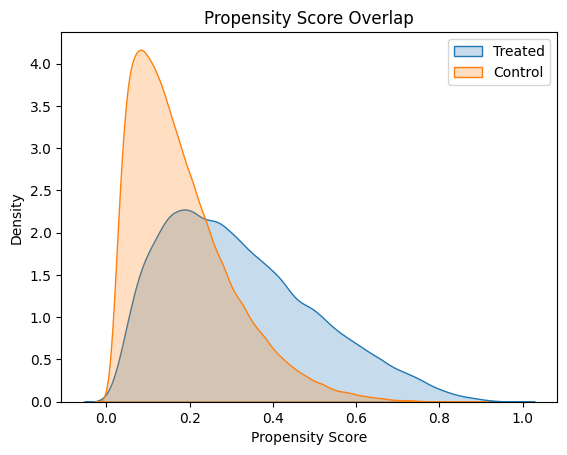

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

T_calc = np.array(test_df["Pitch_Breaking"].tolist())

# Assuming T is a pandas Series or array of 0s and 1s
sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.title('Propensity Score Overlap')
plt.legend()
plt.show()


/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15319/2295991215.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15319/2295991215.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)


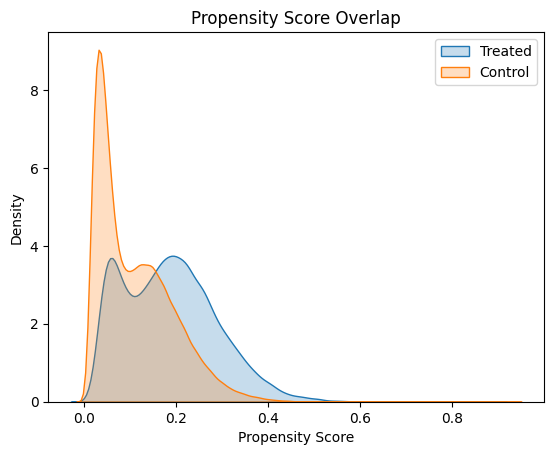

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

T_calc = np.array(test_df["Pitch_Offspeed"].tolist())

# Assuming T is a pandas Series or array of 0s and 1s
sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.title('Propensity Score Overlap')
plt.legend()
plt.show()


/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15319/2295991215.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15319/2295991215.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)


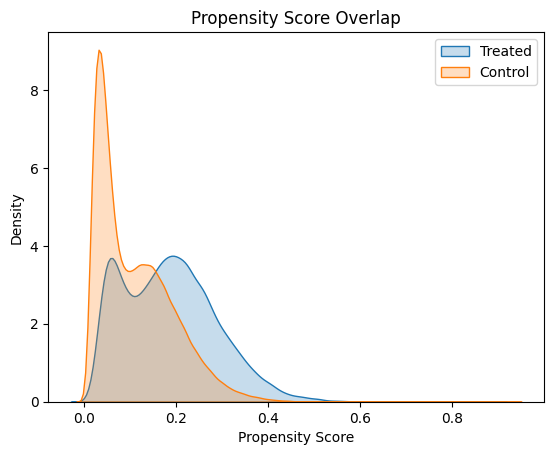

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

T_calc = np.array(test_df["Pitch_Offspeed"].tolist())

# Assuming T is a pandas Series or array of 0s and 1s
sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.title('Propensity Score Overlap')
plt.legend()
plt.show()


/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15319/2295991215.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15319/2295991215.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)


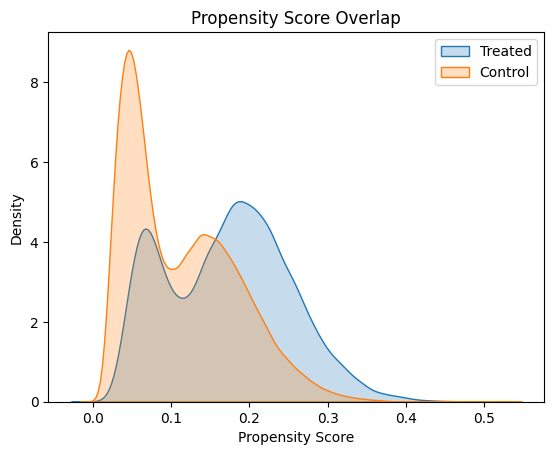

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

T_calc = np.array(test_df["Pitch_Offspeed"].tolist())

# Assuming T is a pandas Series or array of 0s and 1s
sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.title('Propensity Score Overlap')
plt.legend()
plt.show()


/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15319/2295991215.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15319/2295991215.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)


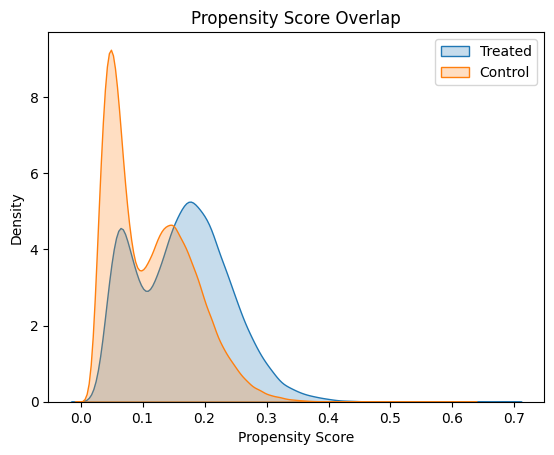

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

T_calc = np.array(test_df["Pitch_Offspeed"].tolist())

# Assuming T is a pandas Series or array of 0s and 1s
sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.title('Propensity Score Overlap')
plt.legend()
plt.show()


/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15319/2295991215.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15319/2295991215.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)


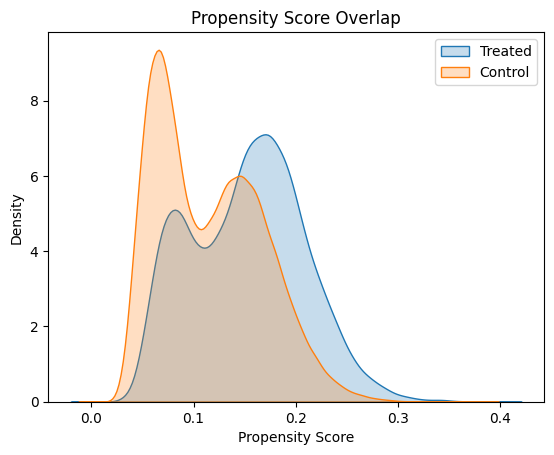

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

T_calc = np.array(test_df["Pitch_Offspeed"].tolist())

# Assuming T is a pandas Series or array of 0s and 1s
sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.title('Propensity Score Overlap')
plt.legend()
plt.show()


/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15319/2295991215.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15319/2295991215.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)


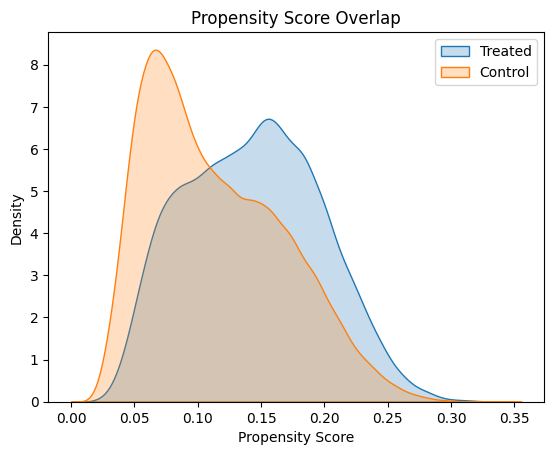

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

T_calc = np.array(test_df["Pitch_Offspeed"].tolist())

# Assuming T is a pandas Series or array of 0s and 1s
sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.title('Propensity Score Overlap')
plt.legend()
plt.show()


/Users/evanbruno/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/evanbruno/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

IndexError: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 324527

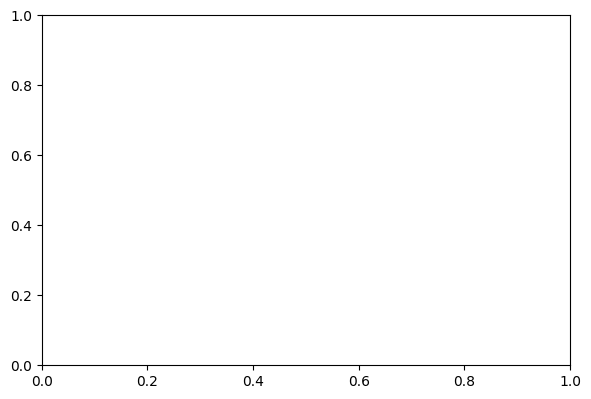

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Assuming test_df is already loaded with pitch type columns
# We'll implement a multinomial model for all pitch types instead of binary

# Step 1: Prepare features and multi-class target
X = test_df.drop(columns=['IsOut', 'Pitch_Breaking', 'Pitch_Fastball',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Distance_From_Center', 'End_Speed', 'Speed', 'Strike_pitch',
       'Swinging', 'Start_speed', 'breakAngle', 'breakLength',
       'spinRate', 'Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed', 'sequence_encoded', 'Movement Fastball_Out_pitch', 'Breaking_Out_pitch', 'Offspeed_Out_pitch'])

# Define pitch categories (update these based on your actual columns)
pitch_types = ['Pitch_Fastball', 'Pitch_Breaking', 'Pitch_Offspeed', 'Pitch_Movement Fastball']

# We can use sklearn's OneVsRestClassifier with LogisticRegression to implement multinomial logistic regression
# This effectively fits separate models for each pitch type
model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=1000))
model.fit(X, test_df[pitch_types])

# Predict probabilities for each pitch type
probabilities = model.predict_proba(X)

# Create a figure for all overlap plots
plt.figure(figsize=(15, 10))

# Create overlap plots for each pitch type
for i, pitch_type in enumerate(pitch_types):
    # Get the binary treatment indicator for this pitch type
    treatment = test_df[pitch_type].values
    
    # Get propensity scores (probability) for this pitch type
    propensity_scores = probabilities[i]
    
    # Create subplot
    plt.subplot(2, 2, i+1)
    
    # Plot density for treated and control
    sns.kdeplot(propensity_scores[treatment == 1], label='Treated', shade=True)
    sns.kdeplot(propensity_scores[treatment == 0], label='Control', shade=True)
    
    plt.xlabel('Propensity Score')
    plt.ylabel('Density')
    plt.title(f'Propensity Score Overlap - {pitch_type}')
    plt.legend()
    plt.xlim(0, 1)  # Set x-axis limits for consistency

plt.tight_layout()
plt.show()

# Alternative approach using sklearn's direct multinomial logistic regression
# This might be more appropriate for mutually exclusive pitch types
from sklearn.linear_model import LogisticRegression

# Create a single categorical target (assuming pitch types are mutually exclusive)
# First, get the actual pitch type from the binary columns
pitch_columns = ['Pitch_Fastball', 'Pitch_Breaking', 'Pitch_Offspeed', 'Pitch_Movement Fastball']

# If you have a single column that already encodes pitch type (e.g., Pitch_Type_encoded)
# you can use that directly instead of creating target_categorical
if 'Pitch_Type_encoded' in test_df.columns:
    target_categorical = test_df['Pitch_Type_encoded']
else:
    # Create categorical target from binary columns (if needed)
    target_categorical = np.nan
    for i, col in enumerate(pitch_columns):
        target_categorical = np.where(test_df[col] == 1, i, target_categorical)

# Fit multinomial logistic regression
multi_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
multi_model.fit(X, target_categorical)

# Predict probabilities
multi_probabilities = multi_model.predict_proba(X)

# Create another figure for the true multinomial model
plt.figure(figsize=(15, 10))

# Create overlap plots for each pitch type with the true multinomial model
for i, pitch_type in enumerate(pitch_columns):
    # Get the binary treatment indicator
    treatment = test_df[pitch_type].values
    
    # Get propensity scores from multinomial model
    propensity_scores = multi_probabilities[:, i]
    
    # Create subplot
    plt.subplot(2, 2, i+1)
    
    # Plot density for treated and control
    sns.kdeplot(propensity_scores[treatment == 1], label='Treated', shade=True)
    sns.kdeplot(propensity_scores[treatment == 0], label='Control', shade=True)
    
    plt.xlabel('Propensity Score')
    plt.ylabel('Density')
    plt.title(f'Multinomial Propensity Score Overlap - {pitch_type}')
    plt.legend()
    plt.xlim(0, 1)  # Set x-axis limits for consistency

plt.tight_layout()
plt.show()

# Function to calculate inverse probability weights for each treatment
def calculate_ipw(probabilities, treatments):
    """Calculate inverse probability weights for multiple treatments"""
    weights = {}
    for i, treatment_name in enumerate(treatments):
        treatment = test_df[treatment_name].values
        prob = probabilities[:, i]
        
        # Calculate IPW
        ipw = np.where(treatment == 1, 
                       1 / (prob + 1e-8),  # Add small constant to avoid division by zero
                       1 / (1 - prob + 1e-8))
        
        weights[treatment_name] = ipw
    
    return weights

# Calculate weights if needed for further analysis
ipw_weights = calculate_ipw(multi_probabilities, pitch_columns)

# Optional: Print summary statistics of weights
for pitch_type, weights in ipw_weights.items():
    print(f"Weights summary for {pitch_type}:")
    print(f"  Mean: {np.mean(weights):.2f}")
    print(f"  Median: {np.median(weights):.2f}")
    print(f"  Max: {np.max(weights):.2f}")
    print(f"  Min: {np.min(weights):.2f}")

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_46947/3739437442.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_46947/3739437442.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)


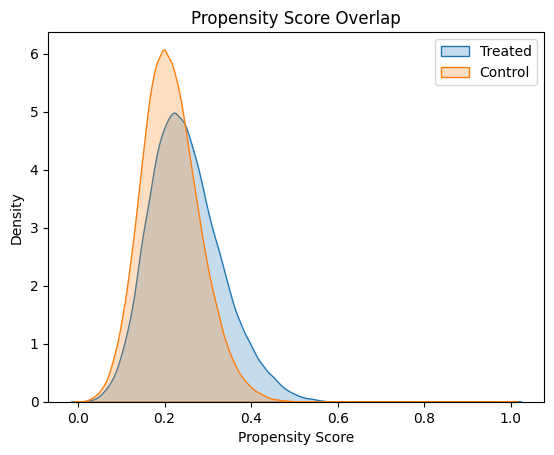

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

T_calc = np.array(test_df["Pitch_Breaking"].tolist())

# Assuming T is a pandas Series or array of 0s and 1s
sns.kdeplot(gps_probs[T_calc == 1], label='Treated', shade=True)
sns.kdeplot(gps_probs[T_calc == 0], label='Control', shade=True)
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.title('Propensity Score Overlap')
plt.legend()
plt.show()


In [63]:
Y = total_df['IsOut']

T = total_df[['Pitch_Breaking']]

X = total_df.drop(columns=['IsOut', 'Pitch_Breaking', 'Pitch_Fastball',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Distance_From_Center',  'End_Speed', 'Speed','Strike_pitch',
       'Swinging','Start_speed', 'breakAngle', 'breakLength',
       'spinRate','Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed',])

covariates = ['IsOut', 'Pitch_Breaking', 'Pitch_Fastball',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Distance_From_Center',  'End_Speed', 'Speed','Strike_pitch',
       'Swinging','Start_speed', 'breakAngle', 'breakLength',
       'spinRate','Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed']

In [64]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Step 1: Estimate propensity scores e(X)
#propensity_model = RandomForestClassifier()
#propensity_model.fit(X, T)
#e_hat = propensity_model.predict_proba(X)[:, 1]  # P(T=1 | X)


# Fit binary logistic regression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X, T)
e_hat = model.predict_proba(X)[:, 1]  # P(T=1 | X)


# Predict propensity scores (prob of being thrown a fastball)
gps_probs = model.predict_proba(X)[:, 1]  # Only prob of treatment = 1

# Step 2: Estimate potential outcomes μ₁(X) and μ₀(X)
model_mu_1 = RandomForestRegressor()
model_mu_0 = RandomForestRegressor()

x_1 = total_df.loc[total_df['Pitch_Breaking'] == 1].drop(columns=covariates)

y_1 = total_df.loc[total_df['Pitch_Breaking'] == 1]['IsOut']

x_0 = total_df.loc[total_df['Pitch_Breaking'] == 0].drop(columns=covariates)

y_0 = total_df.loc[total_df['Pitch_Breaking'] == 0]['IsOut']

model_mu_1.fit(x_1, y_1)
model_mu_0.fit(x_0, y_0)

mu_1_hat = model_mu_1.predict(X)
mu_0_hat = model_mu_0.predict(X)

T_calc = np.array(T['Pitch_Breaking'].tolist())

# Step 3: Compute AIPW scores
aipw_scores = (T_calc * (Y - mu_1_hat) / e_hat - 
               (1 - T_calc) * (Y - mu_0_hat) / (1 - e_hat) + 
               (mu_1_hat - mu_0_hat))

# Step 4: Estimate ATE
ate = np.mean(aipw_scores)


/Users/evanbruno/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/evanbruno/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
T_calc = np.array(T['Pitch_Breaking'].tolist())

# Step 3: Compute AIPW scores
aipw_scores = (T_calc * (Y - mu_1_hat) / e_hat - 
               (1 - T_calc) * (Y - mu_0_hat) / (1 - e_hat) + 
               (mu_1_hat - mu_0_hat))

# Step 4: Estimate ATE
ate = np.mean(aipw_scores)

In [67]:
ate

-0.045039206886702994

In [127]:
aipw_scores_array = aipw_scores.to_numpy()
aipw_scores_array = aipw_scores_array[~np.isnan(aipw_scores_array)]
n = len(aipw_scores_array)

bootstrap_ates = []
for _ in range(n_bootstraps):
    sample_idx = rng.integers(0, n, size=n)
    sample_scores = aipw_scores_array[sample_idx]
    bootstrap_ates.append(np.mean(sample_scores))

lower = np.percentile(bootstrap_ates, 2.5)
upper = np.percentile(bootstrap_ates, 97.5)

print(f"ATE: {np.mean(aipw_scores_array):.4f}")
print(f"95% CI: [{lower:.4f}, {upper:.4f}]")


ATE: 0.0236
95% CI: [0.0217, 0.0260]


In [137]:
import statsmodels.api as sm
import pandas as pd

# Assuming you have a DataFrame `df` with features 'X' and target 'y'
# X = your independent variables (features)
# y = your dependent variable (target)

X = total_df.drop(columns=['IsOut', 'Pitch_Fastball',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Distance_From_Center',  'End_Speed', 'Speed','Strike_pitch',
       'Swinging','Start_speed', 'breakAngle', 'breakLength',
       'spinRate','Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed'])

# Add a constant to the model (for the intercept)
X = sm.add_constant(X[['Prev_speed', 'Pitches_faced', 'Atbats_faced', 'Pitch_count', 'Other',
       'Fastball', 'Movement Fastball', 'Breaking', 'Offspeed',
       'Non-Competitive', 'Outs', 'spinRate_rolling', 'breakLength_rolling',
       'Start_speed_rolling', 'Inning', 'AVG', 'OBP', 'SLG',
       'Matchup_LHP_vs_LHB', 'Matchup_LHP_vs_RHB', 'Matchup_RHP_vs_LHB',
       'Score_differential', 'Count_3-2', 'Pitch_Breaking']])  # Add more features as needed
y = total_df['IsOut']

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.684554
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  IsOut   No. Observations:               501996
Model:                          Logit   Df Residuals:                   501972
Method:                           MLE   Df Model:                           23
Date:                Fri, 25 Apr 2025   Pseudo R-squ.:                0.006418
Time:                        19:24:02   Log-Likelihood:            -3.4364e+05
converged:                       True   LL-Null:                   -3.4586e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Prev_speed              0.0014      0.001      2.336      0.019       0.000       0.003
Pi

In [134]:
sm.add_constant(X).columns

Index(['Prev_speed', 'Pitches_faced', 'Atbats_faced', 'Pitch_count', 'Other',
       'Fastball', 'Movement Fastball', 'Breaking', 'Offspeed',
       'Non-Competitive', 'Outs', 'spinRate_rolling', 'breakLength_rolling',
       'Start_speed_rolling', 'Inning', 'AVG', 'OBP', 'SLG',
       'Matchup_LHP_vs_LHB', 'Matchup_LHP_vs_RHB', 'Matchup_RHP_vs_LHB',
       'Score_differential', 'sequence_encoded', 'Count_3-2',
       'Pitch_Breaking'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.utils import resample
import matplotlib.pyplot as plt
import time
from joblib import Parallel, delayed

# Simple OLS regression for baseline comparison
def run_ols_baseline(total_df):
    # Create X matrix with just the breaking ball variable and a constant
    X_simple = pd.DataFrame({'constant': 1, 'breaking_ball': total_df['Pitch_Breaking']})
    y = total_df['IsOut']
    
    # Fit OLS model
    ols_model = LinearRegression(fit_intercept=False)  # No intercept since we added constant column
    ols_model.fit(X_simple, y)
    
    # Extract coefficients
    baseline_prob = ols_model.coef_[0]  # Probability of out with non-breaking ball
    effect = ols_model.coef_[1]        # Additional effect of breaking ball
    
    print(f"Baseline out probability (non-breaking): {baseline_prob:.4f}")
    print(f"Effect of breaking ball (simple OLS): {effect:.4f}")
    print(f"Out probability with breaking ball: {baseline_prob + effect:.4f}")
    
    return baseline_prob, effect

# AIPW estimation function
def compute_aipw_estimate(df, X, T, Y, covariates):
    # Step 1: Estimate propensity scores
    model = LogisticRegression(solver='lbfgs', max_iter=1000)
    model.fit(X, T)
    e_hat = model.predict_proba(X)[:, 1]  # P(T=1 | X)
    
    # Optional: Trim extreme propensity scores
    trim_idx = (e_hat > 0.05) & (e_hat < 0.95)
    if sum(~trim_idx) > 0:
        print(f"Trimming {sum(~trim_idx)} observations with extreme propensity scores")
    
    X_trimmed = X[trim_idx]
    T_trimmed = T[trim_idx]
    Y_trimmed = Y[trim_idx]
    e_hat_trimmed = e_hat[trim_idx]
    
    # Step 2: Estimate potential outcomes
    treated_idx = T_trimmed == 1
    control_idx = T_trimmed == 0
    
    model_mu_1 = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    model_mu_0 = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    
    model_mu_1.fit(X_trimmed[treated_idx], Y_trimmed[treated_idx])
    model_mu_0.fit(X_trimmed[control_idx], Y_trimmed[control_idx])
    
    mu_1_hat = model_mu_1.predict(X_trimmed)
    mu_0_hat = model_mu_0.predict(X_trimmed)
    
    # Step 3: Compute AIPW scores
    T_array = np.array(T_trimmed).flatten()
    Y_array = np.array(Y_trimmed)
    
    aipw_scores = (T_array * (Y_array - mu_1_hat) / e_hat_trimmed - 
                  (1 - T_array) * (Y_array - mu_0_hat) / (1 - e_hat_trimmed) + 
                  (mu_1_hat - mu_0_hat))
    
    # Step 4: Estimate ATE
    ate = np.mean(aipw_scores)
    
    return ate, aipw_scores

# Full bootstrap function (to be run in parallel)
def single_bootstrap_iteration(i, total_df, X_columns, full=True):
    # Sample with replacement
    bootstrap_sample = resample(total_df, replace=True, n_samples=len(total_df))
    
    # Extract variables
    X_boot = bootstrap_sample[X_columns]
    T_boot = bootstrap_sample['Pitch_Breaking']
    Y_boot = bootstrap_sample['IsOut']
    
    if full:
        # Full re-estimation for each bootstrap sample
        ate_boot, _ = compute_aipw_estimate(bootstrap_sample, X_boot, T_boot, Y_boot, X_columns)
        return ate_boot
    else:
        # Simplified bootstrap (just resampling TEs)
        return np.mean(resample(original_aipw_scores, replace=True, n_samples=len(original_aipw_scores)))

# Main function to run everything
def run_analysis(total_df, X_columns, n_bootstrap=500, parallel=True, n_jobs=4):
    start_time = time.time()
    
    # First get baseline comparison from OLS
    baseline_prob, simple_effect = run_ols_baseline(total_df)
    
    # Extract variables for AIPW
    X = total_df[X_columns]
    T = total_df['Pitch_Breaking']
    Y = total_df['IsOut']
    
    # Initial AIPW estimate
    print("\nComputing initial AIPW estimate...")
    ate, original_aipw_scores = compute_aipw_estimate(total_df, X, T, Y, X_columns)
    print(f"AIPW Average Treatment Effect: {ate:.4f}")
    
    # Full bootstrap for confidence intervals
    print(f"\nPerforming {n_bootstrap} bootstrap iterations for confidence intervals...")
    
    if parallel:
        # Parallel processing for bootstrap
        bootstrap_results = Parallel(n_jobs=n_jobs)(
            delayed(single_bootstrap_iteration)(i, total_df, X_columns) 
            for i in range(n_bootstrap)
        )
    else:
        # Sequential processing
        bootstrap_results = []
        for i in range(n_bootstrap):
            if i % 10 == 0:
                print(f"Bootstrap iteration {i}/{n_bootstrap}")
            bootstrap_results.append(single_bootstrap_iteration(i, total_df, X_columns))
    
    # Calculate confidence intervals
    bootstrap_results = np.array(bootstrap_results)
    ci_lower = np.percentile(bootstrap_results, 2.5)
    ci_upper = np.percentile(bootstrap_results, 97.5)
    
    print(f"AIPW ATE: {ate:.4f}")
    print(f"95% CI from full bootstrap: [{ci_lower:.4f}, {ci_upper:.4f}]")
    
    # Plot bootstrap distribution
    plt.figure(figsize=(10, 6))
    plt.hist(bootstrap_results, bins=30, alpha=0.7)
    plt.axvline(ate, color='red', linestyle='--', label=f'Original ATE: {ate:.4f}')
    plt.axvline(ci_lower, color='green', linestyle='--', label=f'2.5%: {ci_lower:.4f}')
    plt.axvline(ci_upper, color='green', linestyle='--', label=f'97.5%: {ci_upper:.4f}')
    plt.title('Bootstrap Distribution of AIPW Treatment Effect Estimates')
    plt.xlabel('Treatment Effect')
    plt.ylabel('Frequency')
    plt.legend()
    
    execution_time = time.time() - start_time
    print(f"\nExecution time: {execution_time:.2f} seconds")
    
    return ate, (ci_lower, ci_upper), bootstrap_results

# Example usage
# Assuming total_df contains your data and X_columns is a list of your covariates
# X_columns = ['Velocity', 'SpinRate', 'HorizontalBreak', etc.]
# run_analysis(total_df, X_columns, n_bootstrap=500, parallel=True, n_jobs=4)

In [84]:
ate

0.019988139957012936

In [87]:
Y = total_df['IsOut']

T = total_df[['Pitch_Fastball']]

X = total_df.drop(columns=['IsOut', 'Pitch_Breaking', 'Pitch_Fastball',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Distance_From_Center',  'End_Speed', 'Speed','Strike_pitch',
       'Swinging','Start_speed', 'breakAngle', 'breakLength',
       'spinRate','Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed',])

covariates = ['IsOut', 'Pitch_Breaking', 'Pitch_Fastball',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Distance_From_Center',  'End_Speed', 'Speed','Strike_pitch',
       'Swinging','Start_speed', 'breakAngle', 'breakLength',
       'spinRate','Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed']

In [88]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Step 1: Estimate propensity scores e(X)
propensity_model = RandomForestClassifier()
propensity_model.fit(X, T)
e_hat = propensity_model.predict_proba(X)[:, 1]  # P(T=1 | X)

# Step 2: Estimate potential outcomes μ₁(X) and μ₀(X)
model_mu_1 = RandomForestRegressor()
model_mu_0 = RandomForestRegressor()

x_1 = total_df.loc[total_df['Pitch_Fastball'] == 1].drop(columns=covariates)

y_1 = total_df.loc[total_df['Pitch_Fastball'] == 1]['IsOut']

x_0 = total_df.loc[total_df['Pitch_Fastball'] == 0].drop(columns=covariates)

y_0 = total_df.loc[total_df['Pitch_Fastball'] == 0]['IsOut']

model_mu_1.fit(x_1, y_1)
model_mu_0.fit(x_0, y_0)

mu_1_hat = model_mu_1.predict(X)
mu_0_hat = model_mu_0.predict(X)

T_calc = np.array(T['Pitch_Fastball'].tolist())

# Step 3: Compute AIPW scores
aipw_scores = ((T_calc / e_hat / e_hat) * (Y - mu_1_hat) -
               ((1 - T_calc) / (1 - e_hat)) * (Y - mu_0_hat) +
               (mu_1_hat - mu_0_hat))

# Step 4: Estimate ATE
ate = np.mean(aipw_scores)


/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_31067/352630163.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_31067/352630163.py:30: RuntimeWarning:

invalid value encountered in true_divide

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_31067/352630163.py:31: RuntimeWarning:

invalid value encountered in true_divide



In [89]:
ate

-0.01960370513637506

In [91]:
Y = total_df['IsOut']

T = total_df[['Pitch_Movement Fastball']]

X = total_df.drop(columns=['IsOut', 'Pitch_Breaking', 'Pitch_Fastball',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Distance_From_Center',  'End_Speed', 'Speed','Strike_pitch',
       'Swinging','Start_speed', 'breakAngle', 'breakLength',
       'spinRate','Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed',])

covariates = ['IsOut', 'Pitch_Breaking', 'Pitch_Fastball',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Distance_From_Center',  'End_Speed', 'Speed','Strike_pitch',
       'Swinging','Start_speed', 'breakAngle', 'breakLength',
       'spinRate','Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed']

In [92]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Step 1: Estimate propensity scores e(X)
propensity_model = RandomForestClassifier()
propensity_model.fit(X, T)
e_hat = propensity_model.predict_proba(X)[:, 1]  # P(T=1 | X)

# Step 2: Estimate potential outcomes μ₁(X) and μ₀(X)
model_mu_1 = RandomForestRegressor()
model_mu_0 = RandomForestRegressor()

x_1 = total_df.loc[total_df['Pitch_Movement Fastball'] == 1].drop(columns=covariates)

y_1 = total_df.loc[total_df['Pitch_Movement Fastball'] == 1]['IsOut']

x_0 = total_df.loc[total_df['Pitch_Movement Fastball'] == 0].drop(columns=covariates)

y_0 = total_df.loc[total_df['Pitch_Movement Fastball'] == 0]['IsOut']

model_mu_1.fit(x_1, y_1)
model_mu_0.fit(x_0, y_0)

mu_1_hat = model_mu_1.predict(X)
mu_0_hat = model_mu_0.predict(X)

T_calc = np.array(T['Pitch_Movement Fastball'].tolist())

# Step 3: Compute AIPW scores
aipw_scores = ((T_calc / e_hat / e_hat) * (Y - mu_1_hat) -
               ((1 - T_calc) / (1 - e_hat)) * (Y - mu_0_hat) +
               (mu_1_hat - mu_0_hat))

# Step 4: Estimate ATE
ate = np.mean(aipw_scores)


/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_31067/4196775390.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_31067/4196775390.py:30: RuntimeWarning:

invalid value encountered in true_divide

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_31067/4196775390.py:31: RuntimeWarning:

invalid value encountered in true_divide



In [93]:
ate

-0.016662759212895013

In [95]:
import numpy as np

# Assume aipw_scores is already calculated
# Number of bootstrap samples
n_bootstraps = 200
n = len(aipw_scores)
rng = np.random.default_rng(seed=42)

aipw_scores_array = aipw_scores.to_numpy()  # safe conversion

bootstrap_ates = []
for _ in range(n_bootstraps):
    sample_idx = rng.integers(0, n, size=n)
    sample_scores = aipw_scores_array[sample_idx]
    bootstrap_ates.append(np.mean(sample_scores))



In [96]:
bootstrap_ates

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [97]:
print(np.isnan(aipw_scores_array).sum())  # should be 0 ideally
print(aipw_scores_array[:10])  # sanity check values


53155
[-0.68649485 -0.34494845 -0.45446809 -0.34276596 -0.32148936 -0.60087912
  0.64252525  0.65346939 -0.71111111 -0.7422449 ]


In [99]:
len(aipw_scores_array)

501996

In [100]:
aipw_scores_array = aipw_scores.to_numpy()
aipw_scores_array = aipw_scores_array[~np.isnan(aipw_scores_array)]
n = len(aipw_scores_array)

bootstrap_ates = []
for _ in range(n_bootstraps):
    sample_idx = rng.integers(0, n, size=n)
    sample_scores = aipw_scores_array[sample_idx]
    bootstrap_ates.append(np.mean(sample_scores))

lower = np.percentile(bootstrap_ates, 2.5)
upper = np.percentile(bootstrap_ates, 97.5)

print(f"ATE: {np.mean(aipw_scores_array):.4f}")
print(f"95% CI: [{lower:.4f}, {upper:.4f}]")


ATE: -0.0167
95% CI: [-0.0180, -0.0153]


/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_31067/1623815475.py:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_31067/1623815475.py:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




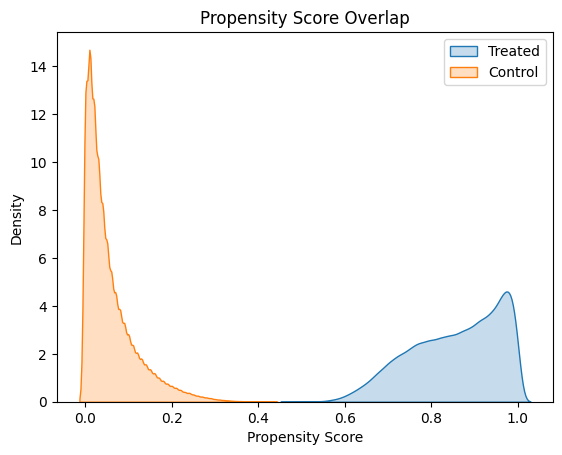

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming T is a pandas Series or array of 0s and 1s
sns.kdeplot(e_hat[T_calc == 1], label='Treated', shade=True)
sns.kdeplot(e_hat[T_calc == 0], label='Control', shade=True)
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.title('Propensity Score Overlap')
plt.legend()
plt.show()


In [111]:
propensity = np.array(X['Propensity_Score'].tolist())

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_31067/3150352340.py:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_31067/3150352340.py:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




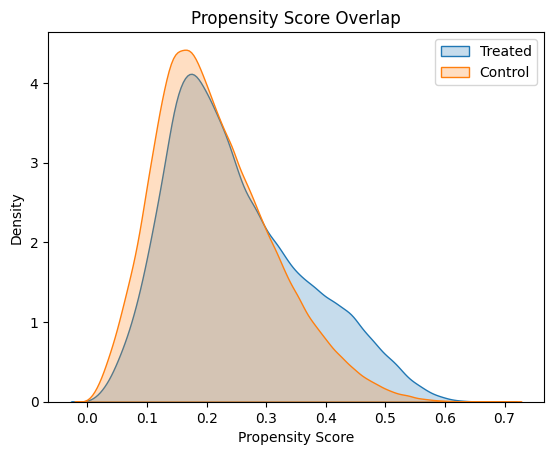

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming T is a pandas Series or array of 0s and 1s
sns.kdeplot(propensity[T_calc == 1], label='Treated', shade=True)
sns.kdeplot(propensity[T_calc == 0], label='Control', shade=True)
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.title('Propensity Score Overlap')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression

# Step 1: Fit model_y
model_y = RandomForestRegressor()
model_y.fit(np.hstack([X, X]), Y)  # using W=X as in your example
Y_hat = model_y.predict(np.hstack([X, X]))

# Step 2: Fit model_t
model_t = RandomForestClassifier()
model_t.fit(np.hstack([X, X]), T)
T_hat_proba = model_t.predict_proba(np.hstack([X, X]))[:, 1]  # Prob(T=1)

# Step 3: Residualize
Y_res = Y - Y_hat
T_res = T - T_hat_proba

# Step 4: Final stage regression
final_model = LinearRegression()
final_model.fit(T_res.reshape(-1, 1), Y_res)  # optionally add X for heterogeneity

# Estimate treatment effect
te = final_model.coef_[0]


In [ ]:
import numpy as np
from sklearn.utils import resample

# Function to calculate treatment effect (e.g., ATE) from bootstrap samples
def bootstrap_te(X, Y, T, model, n_iterations=100):
    bootstrapped_treatment_effects = []
    
    for _ in range(n_iterations):
        # Resample the data with replacement
        X_resampled, Y_resampled, T_resampled = resample(X, Y, T, random_state=42)
        
        # Fit the model on the resampled data
        model.fit(Y_resampled, T_resampled, X=X_resampled)
        
        # Get treatment effect for this resample
        te_resample = model.effect(X_resampled)
        bootstrapped_treatment_effects.append(np.mean(te_resample))  # Use mean treatment effect
        
    return np.array(bootstrapped_treatment_effects)

# Bootstrapping treatment effects
bootstrapped_te = bootstrap_te(X, Y, T, est, n_iterations=1000)

# Calculate the 95% confidence interval for the treatment effect
lower_bound = np.percentile(bootstrapped_te, 2.5)
upper_bound = np.percentile(bootstrapped_te, 97.5)

# Display the confidence interval
print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")

# Check if 0 is outside the confidence interval to assess significance
if lower_bound > 0 or upper_bound < 0:
    print("The treatment effect is statistically significant at the 95% level.")
else:
    print("The treatment effect is not statistically significant.")


Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-varianc

Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-varianc

Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-variance matrix is underdetermined. Inference will be invalid!
Co-varianc

In [89]:
Y = total_df['IsOut']

T = total_df[['Pitch_Fastball']]

X = total_df.drop(columns=['IsOut', 'Pitch_Breaking', 'Pitch_Fastball',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Distance_From_Center',  'End_Speed', 'Speed','Strike_pitch',
       'Swinging','Start_speed', 'breakAngle', 'breakLength',
       'spinRate','Pitch_Type_encoded', 'roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed',])

In [90]:
import numpy as np
from econml.dml import LinearDML
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


est = LinearDML(
    model_y=RandomForestRegressor(),
    model_t=RandomForestClassifier(),
    linear_first_stages=False,
    discrete_treatment=True,
    random_state=42
)

# Fit the model
est.fit(Y, T, X=X, W=X)

# Estimate treatment effect
te = est.effect(X)

np.mean(te)

Co-variance matrix is underdetermined. Inference will be invalid!


-0.038100959550969676

In [63]:
Y = total_df['IsOut']

T = total_df[['Pitch_Breaking']]

X = total_df.drop(columns=['IsOut', 'Start_speed','breakAngle','breakLength', 'Pitch_Breaking', 'Pitch_Fastball',
       'Pitch_Movement Fastball', 'Pitch_Non-Competitive', 'Pitch_Offspeed',
       'Pitch_Other', 'Swinging', 'Distance_From_Center', 'spinRate', 'End_Speed', 'Speed','Strike_pitch',])


In [64]:
X.columns

Index(['roll_Start_speed_std', 'roll_End_speed_std', 'Rolling_start_speed',
       'Rolling_end_speed', 'Prev_speed', 'Pitches_faced', 'Atbats_faced',
       'Pitch_count', 'Other', 'Fastball', 'Movement Fastball', 'Breaking',
       'Offspeed', 'Non-Competitive', 'Outs', 'spinRate_rolling',
       'breakLength_rolling', 'Start_speed_rolling', 'Inning', 'AVG', 'OBP',
       'SLG', 'Matchup_LHP_vs_LHB', 'Matchup_LHP_vs_RHB', 'Matchup_RHP_vs_LHB',
       'Score_differential', 'sequence_encoded', 'Count_3-2',
       'Pitch_Type_encoded'],
      dtype='object')

In [ ]:
import numpy as np
from econml.dml import LinearDML
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


est = LinearDML(
    model_y=RandomForestRegressor(),
    model_t=RandomForestClassifier(),
    linear_first_stages=False,
    discrete_treatment=True,
    random_state=42
)

# Fit the model
est.fit(Y, T, X=X, W=X)

# Estimate treatment effect
te = est.effect(X)


In [ ]:
total_df.drop(columns=['Pitch_Type_encoded', 'Pitch_Fastball', 'Pitch_Movement Fastball', 'Pitch_Non-Competitive',
       'Pitch_Offspeed', 'Pitch_Other'], inplace=True)

In [57]:
total_df.drop(columns=['Pitch_Type_encoded', 'Pitch_Fastball', 'Pitch_Movement Fastball', 'Pitch_Non-Competitive',
       'Pitch_Offspeed', 'Pitch_Other'], inplace=True)

In [58]:
total_df.columns

Index(['Pitches_faced', 'Atbats_faced', 'Pitch_count', 'Other', 'Fastball',
       'Movement Fastball', 'Breaking', 'Offspeed', 'Non-Competitive', 'Outs',
       'spinRate_rolling', 'breakLength_rolling', 'Start_speed_rolling',
       'Start_speed', 'breakAngle', 'breakLength', 'spinRate', 'Inning',
       'IsOut', 'AVG', 'OBP', 'SLG', 'rolling_spinRate_Fastball',
       'rolling_spinRate_Movement Fastball', 'rolling_spinRate_Breaking',
       'rolling_spinRate_Offspeed', 'rolling_spinRate_Non-Competitive',
       'rolling_breakLength_Fastball', 'rolling_breakLength_Movement Fastball',
       'rolling_breakLength_Breaking', 'rolling_breakLength_Offspeed',
       'rolling_breakLength_Non-Competitive', 'rolling_Start_speed_Fastball',
       'rolling_Start_speed_Movement Fastball', 'rolling_Start_speed_Breaking',
       'rolling_Start_speed_Offspeed', 'rolling_Start_speed_Non-Competitive',
       'rolling_breakVerticalInduced_Fastball',
       'rolling_breakVerticalInduced_Movement Fastba

In [59]:
total_df.drop(columns=['spinRate_rolling', 'breakLength_rolling', 'Start_speed_rolling',
       'Start_speed', 'breakAngle', 'breakLength', 'spinRate' ,'sequence_encoded'], inplace=True)

In [60]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt



In [63]:
test_df = total_df.copy()

In [ ]:
import numpy as np
from econml.dml import LinearDML
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

Y = test_df['Pitch_Breaking']

T = test_df['IsOut']

X = test_df.drop(columns=['IsOut', 'Pitch_Breaking', 'Distance_From_Center'])

# Example: linear final stage, flexible nuisance models
est = LinearDML(
    model_y=RandomForestRegressor(),
    model_t=RandomForestClassifier(),
    linear_first_stages=False,
    discrete_treatment=True,
    random_state=42
)

# Fit the model
est.fit(Y, T, X=X, W=X)

# Estimate treatment effect
te = est.effect(X)


In [69]:
ate = te.mean()
ate

0.011494652602331297

In [ ]:
ate = te.mean()
ate

In [64]:
test_df.columns

Index(['Pitches_faced', 'Atbats_faced', 'Pitch_count', 'Other', 'Fastball',
       'Movement Fastball', 'Breaking', 'Offspeed', 'Non-Competitive', 'Outs',
       'Inning', 'IsOut', 'AVG', 'OBP', 'SLG', 'rolling_spinRate_Fastball',
       'rolling_spinRate_Movement Fastball', 'rolling_spinRate_Breaking',
       'rolling_spinRate_Offspeed', 'rolling_spinRate_Non-Competitive',
       'rolling_breakLength_Fastball', 'rolling_breakLength_Movement Fastball',
       'rolling_breakLength_Breaking', 'rolling_breakLength_Offspeed',
       'rolling_breakLength_Non-Competitive', 'rolling_Start_speed_Fastball',
       'rolling_Start_speed_Movement Fastball', 'rolling_Start_speed_Breaking',
       'rolling_Start_speed_Offspeed', 'rolling_Start_speed_Non-Competitive',
       'rolling_breakVerticalInduced_Fastball',
       'rolling_breakVerticalInduced_Movement Fastball',
       'rolling_breakVerticalInduced_Breaking',
       'rolling_breakVerticalInduced_Offspeed',
       'rolling_breakVerticalInduce

In [65]:
import numpy as np
np.linalg.matrix_rank(X)  # should be close to number of columns in X


49

In [67]:
len(X.columns)

49

In [70]:

# Normalize the weights to sum to 1
probabilities = test_df['IPW'] / test_df['IPW'].sum()

# Sample indices based on IPW
sample_indices = np.random.choice(
    test_df.index,
    size=len(test_df),
    replace=True,
    p=probabilities
)

# Create resampled dataframe
resampled_df = test_df.loc[sample_indices].reset_index(drop=True)

# Now draw boxplots as usual, this reflects weighting
for col in covariates:
    if resampled_df[col].nunique() < 10:
        sns.boxplot(x=col, y=col, data=resampled_df, showfliers=False)
        plt.title(f'IPW-Weighted Propensity Score by {col}')
        plt.xticks(rotation=45)
        plt.show()
    else:
        binned_col = f'binned_{col}'
        resampled_df[binned_col] = pd.qcut(resampled_df[col], q=10, duplicates='drop')
        sns.boxplot(x=binned_col, y='Propensity_Score', data=resampled_df, showfliers=False)
        plt.title(f'IPW-Weighted Propensity Score by {col} (Binned)')
        plt.xticks(rotation=45)
        plt.show()


ValueError: Could not interpret value `treatment` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
import statsmodels.api as sm

for col in covariates:
    sm.graphics.weightedt_hist(test_df[col], weights=test_df['IPW'], bins=20)
    plt.title(f'Weighted Distribution of {col}')
    plt.show()
